# Importation of the libraries and datasets

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
import statistics as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy as scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import cufflinks as cf


In [2]:
# FAO Dataframes

# FAO animal slaughter data
slaughter = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/FAOSTAT_slaughtered.csv", 
                        low_memory=False)

# FAO meat production data
meat = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/FAOSTAT_production_quantity.csv", 
                   low_memory=False)

# FAO livestock Stocking data
stock = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/FAOSTAT_stocks.csv", 
                    low_memory=False)

# FAO live stock import / export data
imp_exp = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/FAOSTAT_import_export.csv", 
                      low_memory=False)

# Importing the sentiment data from the Irish Farmers Association
sentiment_df = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/IFA_Sentiment_data.csv", 
                   low_memory=False)

# Important notice for David

Update:
Hi David, so I have semi-solved the problem I explained below. It turns out that it is only a single page of my dashboard 'individual predictions' for 2 (of 5) specific models that is causing the problem. So to save you the hassle I have resubmitted ,y CA with full HTML files for 3 of the models (model no. 1, 2, & 4). In addition, I have included pages 1, 2, 4 & 5 (not page 3) for models 3 and 5 but I cannot download page 3. The ExplainerDashboard is still having problems, so I've included most of the information as HTML but if you want these "2 missing pages" you will have to 'restart and run all'. I would stress, they're the same as the other models page 3 just with different info but the visualisation is the same.


OLD:
David, I just wanted to make you aware of an issue at the top of this assignment in order to save you time when you correct it. In the very last section, section 15 of this assignment I have built my interactive dashboards using the 'ExplainerDashboard' Python library but there is an issue with their end of the library that I cannot fix.

The Dashboards run perfectly, the problem is with trying to export them. If I use "download all" on the download tab in the top right of the launched dashboard, nothing happens. However, if I try to download each dash page individually, then the export to HTML works.

As I have 5 Dashboards, with a few pages each and I cannot export them all in one go to a single HTML (or even 5 separate HTML files for each dash). Downloading each page of each DASH would result in me having to send you in excess of 30 HTML pages in the ZIP file.

For obvious reasons, I have opted to spare you this headache. Therefore, in order to view my Dashboards, you need to plugin the data provided, and restart and run all in order to get the models into memory and have the dashboard load them. The file doesn't take too long but I felt this would save you some time when going to correct this CA, as you can restart it and it can load in as you work away.

I apologise for the inconvenience but I thought it was prudent to warn you here at the beginning of this assignment rather than have you reach the final section and then have to wait for the file to run and the dashes to load.

# Exploratory data analysis

## Animal slaughter data

Here we view the head and shape of the data

In [3]:
slaughter.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2000,2000,Head,832926.0,NaN,Official data
1,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2001,2001,Head,873268.0,NaN,Official data
2,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2002,2002,Head,932473.0,NaN,Official data
3,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2003,2003,Head,853641.0,NaN,Official data
4,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2004,2004,Head,842585.0,NaN,Official data


In [4]:
slaughter.shape

(3746, 14)

In [5]:
slaughter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3746 entries, 0 to 3745
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       3746 non-null   object 
 1   Domain            3746 non-null   object 
 2   Area Code (FAO)   3746 non-null   int64  
 3   Area              3746 non-null   object 
 4   Element Code      3746 non-null   int64  
 5   Element           3746 non-null   object 
 6   Item Code (FAO)   3746 non-null   int64  
 7   Item              3746 non-null   object 
 8   Year Code         3746 non-null   int64  
 9   Year              3746 non-null   int64  
 10  Unit              3746 non-null   object 
 11  Value             3654 non-null   float64
 12  Flag              1401 non-null   object 
 13  Flag Description  3746 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 409.8+ KB


In [6]:
slaughter.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value
count,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3.654000e+03
mean,153.586759,5320.452483,1036.179391,1997.905499,1997.905499,1.232273e+07
std,98.639385,0.497803,73.686268,13.784635,13.784635,5.686957e+07
min,54.000000,5320.000000,867.000000,1973.000000,1973.000000,0.000000e+00
25%,79.000000,5320.000000,1017.000000,1986.000000,1986.000000,1.230950e+04
50%,106.000000,5320.000000,1058.000000,1999.000000,1999.000000,2.321095e+05
75%,231.000000,5321.000000,1080.000000,2010.000000,2010.000000,2.915900e+06
max,351.000000,5321.000000,1163.000000,2020.000000,2020.000000,7.449179e+08


The data is in its current layout is not suitable for statistical analysis as each country is a row.
I need to melt the data so that the values for each country are in a column item type.

In [7]:
slaughter.Item.unique()

array(['Meat, cattle', 'Meat, chicken', 'Meat, duck', 'Meat, goat',
       'Meat, horse', 'Meat, pig', 'Meat, sheep', 'Meat, turkey',
       'Meat, goose and guinea fowl', 'Meat, rabbit', 'Meat, game'],
      dtype=object)

There are 11 animal categories in the slaughter data. I can remove the repetition from these item categories when I clean the data

In [8]:
slaughter.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

The dataset contains 8 EU countries Belgium, Denmark, France, Germany, Luxembourg, Ireland, Italy and the Netherlands. All of these countries have been member states since at least Jan 1st 1973.

Belgium, France, Germany, Luxembourg, Italy and the Netherlands founded the EU in 1957 with Ireland and Denmark Joining on the 1st January 1973.

Therefore, to ensure data comparability between these countries and the US and China, I limited the datasets time frame from 1st January 1973 to 31st December 2020 (most recent data available). This ensures that all European countries were member states of the EU at the time of analysis. 

We can confirm this as follows

In [9]:
slaughter.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999], dtype=int64)

In [10]:
print(f"The earliest year in the dataset is {slaughter.Year.min()} and the maximum year is {slaughter.Year.max()}")

The earliest year in the dataset is 1973 and the maximum year is 2020


Next we can observe what units the slaughter data has been recorded in

In [11]:
slaughter.Unit.unique()

array(['Head', '1000 Head'], dtype=object)

Slaughter units have been reported as per "head" and per "thousand heads" of animal.

In [12]:
slaughter.Element.unique()

array(['Producing Animals/Slaughtered'], dtype=object)

All livestock in this dataset is at slaughter.

Checking for null values

In [13]:
slaughter.isnull().sum()

Domain Code            0
Domain                 0
Area Code (FAO)        0
Area                   0
Element Code           0
Element                0
Item Code (FAO)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                 92
Flag                2345
Flag Description       0
dtype: int64

In [14]:
# Function to calculate % missing

def calc_percent_missing(no_observations, maxobservations):
    '''This takes the number of missing and maximum observations as inputs. It
    then calculates the no of missing observations as a percentage of the total observations'''
    percent_miss = round((no_observations / maxobservations) * (100 / 1), 2)
    print(f"The percentage of missing values is:\n{percent_miss}")
    


In [15]:
calc_percent_missing(slaughter.isnull().sum(), len(slaughter))

The percentage of missing values is:
Domain Code          0.00
Domain               0.00
Area Code (FAO)      0.00
Area                 0.00
Element Code         0.00
Element              0.00
Item Code (FAO)      0.00
Item                 0.00
Year Code            0.00
Year                 0.00
Unit                 0.00
Value                2.46
Flag                62.60
Flag Description     0.00
dtype: float64


There are missing values in the "Value" and "Flag" columns.  The flag column is not important to our data analysis
so I can remove this during data preparation. However, the value column requires further investigation. We can test if these values are missing at random or not at random by filtering the values that are NaN or 0

In [16]:
# Creating a data frame of missing slaughtervalues
slaughter_miss = slaughter.loc[(slaughter['Value'] == slaughter.Value.isnull())]

In [17]:
slaughter_miss.head(50)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
789,QCL,Crops and livestock products,54,Denmark,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2018,2018,Head,0.0,NaN,Official data
790,QCL,Crops and livestock products,54,Denmark,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2019,2019,Head,0.0,NaN,Official data
791,QCL,Crops and livestock products,54,Denmark,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2020,2020,Head,0.0,NaN,Official data
2148,QCL,Crops and livestock products,104,Ireland,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2018,2018,Head,0.0,NaN,Official data
2149,QCL,Crops and livestock products,104,Ireland,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2019,2019,Head,0.0,NaN,Official data
2150,QCL,Crops and livestock products,104,Ireland,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2020,2020,Head,0.0,NaN,Official data
2844,QCL,Crops and livestock products,256,Luxembourg,5321,Producing Animals/Slaughtered,1058,"Meat, chicken",2018,2018,1000 Head,0.0,NaN,Official data
2845,QCL,Crops and livestock products,256,Luxembourg,5321,Producing Animals/Slaughtered,1058,"Meat, chicken",2019,2019,1000 Head,0.0,NaN,Official data
2846,QCL,Crops and livestock products,256,Luxembourg,5321,Producing Animals/Slaughtered,1058,"Meat, chicken",2020,2020,1000 Head,0.0,NaN,Official data
2847,QCL,Crops and livestock products,256,Luxembourg,5321,Producing Animals/Slaughtered,1069,"Meat, duck",2018,2018,1000 Head,0.0,NaN,Official data


In [18]:
# Investigating if the missing data is at random or not at random by checking if it's specific animal categories or not
slaughter_miss.Item.unique()

array(['Meat, goat', 'Meat, chicken', 'Meat, duck', 'Meat, horse',
       'Meat, turkey'], dtype=object)

In [19]:
slaughter_miss.Value.unique()

array([0.])

In [20]:
# Investigating if the missing data is at random or not at random by checking if it's specific country's or not
slaughter_miss.Area.unique()

array(['Denmark', 'Ireland', 'Luxembourg', 'Netherlands'], dtype=object)

In [21]:
slaughter_miss.Year.unique()

array([2018, 2019, 2020, 2000, 2001, 1973, 1974, 1975, 1976], dtype=int64)

This shows that the missing data is NOT at random, certain countries did not submit data for certain animal categories on certain years. I will deal with this during data preparation.

## Meat production data

In [22]:
meat.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2000,2000,tonnes,275360.0,NaN,Official data
1,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2001,2001,tonnes,285250.0,NaN,Official data
2,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2002,2002,tonnes,305388.0,NaN,Official data
3,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2003,2003,tonnes,275170.0,NaN,Official data
4,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2004,2004,tonnes,280931.0,NaN,Official data


In [23]:
meat.shape

(3940, 14)

In [24]:
meat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       3940 non-null   object 
 1   Domain            3940 non-null   object 
 2   Area Code (FAO)   3940 non-null   int64  
 3   Area              3940 non-null   object 
 4   Element Code      3940 non-null   int64  
 5   Element           3940 non-null   object 
 6   Item Code (FAO)   3940 non-null   int64  
 7   Item              3940 non-null   object 
 8   Year Code         3940 non-null   int64  
 9   Year              3940 non-null   int64  
 10  Unit              3940 non-null   object 
 11  Value             3862 non-null   float64
 12  Flag              1298 non-null   object 
 13  Flag Description  3940 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 431.1+ KB


In [25]:
meat.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value
count,3940.000000,3940.0,3940.000000,3940.000000,3940.000000,3.862000e+03
mean,154.790102,5510.0,1042.574873,1997.820051,1997.820051,1.300366e+06
std,99.951755,0.0,77.053159,13.754285,13.754285,4.658044e+06
min,54.000000,5510.0,867.000000,1973.000000,1973.000000,0.000000e+00
25%,79.000000,5510.0,1017.000000,1986.000000,1986.000000,4.966500e+03
50%,106.000000,5510.0,1058.000000,1999.000000,1999.000000,6.400000e+04
75%,231.000000,5510.0,1080.000000,2010.000000,2010.000000,6.888240e+05
max,351.000000,5510.0,1163.000000,2020.000000,2020.000000,5.766187e+07


The data is in its current layout is not suitable for statistical analysis as each country is a row.
I need to melt the data so that the values for each country are in a column item type.

In [26]:
meat.Item.unique()

array(['Meat, cattle', 'Meat, chicken', 'Meat, duck', 'Meat, goat',
       'Meat, horse', 'Meat, pig', 'Meat, sheep', 'Meat, turkey',
       'Meat, game', 'Meat, goose and guinea fowl', 'Meat, rabbit'],
      dtype=object)

There are 11 animal categories in the production data. I can remove the repetition from these item categories when I clean the data

In [27]:
meat.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

As above:

The dataset contains 8 EU countries Belgium, Denmark, France, Germany, Luxembourg, Ireland, Italy and the Netherlands. All of these countries have been member states since at least Jan 1st 1973.

Belgium, France, Germany, Luxembourg, Italy and the Netherlands founded the EU in 1957 with Ireland and Denmark Joining on the 1st January 1973.

Therefore, to ensure data comparability between these countries and the US and China, I limited the datasets time frame from 1st January 1973 to 31st December 2020 (most recent data available). This ensures that all European countries were member states of the EU at the time of analysis. 

We can confirm this as follows

In [28]:
meat.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999], dtype=int64)

In [29]:
print(f"The earliest year in the dataset is {meat.Year.min()} and the maximum year is {meat.Year.max()}")

The earliest year in the dataset is 1973 and the maximum year is 2020


Next we can observe what units the meat production data has been recorded in

In [30]:
meat.Unit.unique()

array(['tonnes'], dtype=object)

Production data units have been reported in "tonnes".

In [31]:
meat.Element.unique()

array(['Production'], dtype=object)

All livestock in this dataset is at production.

Checking for null values

In [32]:
meat.isnull().sum()

Domain Code            0
Domain                 0
Area Code (FAO)        0
Area                   0
Element Code           0
Element                0
Item Code (FAO)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                 78
Flag                2642
Flag Description       0
dtype: int64

In [33]:
calc_percent_missing(meat.isnull().sum(), len(meat))

The percentage of missing values is:
Domain Code          0.00
Domain               0.00
Area Code (FAO)      0.00
Area                 0.00
Element Code         0.00
Element              0.00
Item Code (FAO)      0.00
Item                 0.00
Year Code            0.00
Year                 0.00
Unit                 0.00
Value                1.98
Flag                67.06
Flag Description     0.00
dtype: float64


There are missing values in the "Value" and "Flag" columns.  The flag column is not important to our data analysis
so I can remove this during data preparation. However, the value column requires further investigation. We can test if these values are missing at random or not at random by filtering the values that are NaN or 0

In [34]:
# Creating a data frame of missing meat production
meat_miss = meat.loc[(meat['Value'] == meat.Value.isnull())]

In [35]:
meat_miss.head(50)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
883,QCL,Crops and livestock products,54,Denmark,5510,Production,1017,"Meat, goat",2018,2018,tonnes,0.0,NaN,Official data
884,QCL,Crops and livestock products,54,Denmark,5510,Production,1017,"Meat, goat",2019,2019,tonnes,0.0,NaN,Official data
885,QCL,Crops and livestock products,54,Denmark,5510,Production,1017,"Meat, goat",2020,2020,tonnes,0.0,NaN,Official data
1151,QCL,Crops and livestock products,54,Denmark,5510,Production,1080,"Meat, turkey",2018,2018,tonnes,0.0,NaN,Official data
1152,QCL,Crops and livestock products,54,Denmark,5510,Production,1080,"Meat, turkey",2019,2019,tonnes,0.0,NaN,Official data
1153,QCL,Crops and livestock products,54,Denmark,5510,Production,1080,"Meat, turkey",2020,2020,tonnes,0.0,NaN,Official data
1862,QCL,Crops and livestock products,79,Germany,5510,Production,1017,"Meat, goat",2018,2018,tonnes,0.0,NaN,Official data
1863,QCL,Crops and livestock products,79,Germany,5510,Production,1017,"Meat, goat",2019,2019,tonnes,0.0,NaN,Official data
1864,QCL,Crops and livestock products,79,Germany,5510,Production,1017,"Meat, goat",2020,2020,tonnes,0.0,NaN,Official data
2293,QCL,Crops and livestock products,104,Ireland,5510,Production,1017,"Meat, goat",2018,2018,tonnes,0.0,NaN,Official data


In [36]:
# Investigating if the missing data is at random or not at random by checking if it's specific animal categories or not
meat_miss.Item.unique()

array(['Meat, goat', 'Meat, turkey', 'Meat, chicken', 'Meat, duck',
       'Meat, horse', 'Meat, game'], dtype=object)

In [37]:
meat_miss.Value.unique()

array([0.])

In [38]:
# Investigating if the missing data is at random or not at random by checking if it's specific country's or not
meat_miss.Area.unique()

array(['Denmark', 'Germany', 'Ireland', 'Luxembourg', 'Netherlands'],
      dtype=object)

In [39]:
meat_miss.Year.unique()

array([2018, 2019, 2020, 2000, 2001, 1986, 2005], dtype=int64)

This shows that the missing data is NOT at random, certain countries did not submit data for certain animal categories on certain years. I will deal with this during data preparation.

In addition, it shows that the missing categories and years are similar to the Slaughter data. There may have been no requirement to report for these categories on these years.

## Livestock stocking data

In [40]:
stock.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2000,2000,Head,3041560.0,NaN,Official data
1,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2001,2001,Head,3037760.0,NaN,Official data
2,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2002,2002,Head,2891260.0,NaN,Official data
3,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2003,2003,Head,2778077.0,NaN,Official data
4,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2004,2004,Head,2738648.0,NaN,Official data


In [41]:
stock.shape

(3735, 14)

In [42]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       3735 non-null   object 
 1   Domain            3735 non-null   object 
 2   Area Code (FAO)   3735 non-null   int64  
 3   Area              3735 non-null   object 
 4   Element Code      3735 non-null   int64  
 5   Element           3735 non-null   object 
 6   Item Code (FAO)   3735 non-null   int64  
 7   Item              3735 non-null   object 
 8   Year Code         3735 non-null   int64  
 9   Year              3735 non-null   int64  
 10  Unit              3735 non-null   object 
 11  Value             3670 non-null   float64
 12  Flag              1103 non-null   object 
 13  Flag Description  3735 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 408.6+ KB


In [43]:
stock.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value
count,3735.000000,3735.000000,3735.000000,3735.00000,3735.00000,3.670000e+03
mean,154.917269,5111.448728,1033.941098,1997.31593,1997.31593,1.389960e+07
std,98.436050,0.497431,73.118241,13.67837,13.67837,5.001213e+07
min,54.000000,5111.000000,866.000000,1973.00000,1973.00000,2.000000e+00
25%,79.000000,5111.000000,1016.000000,1985.00000,1985.00000,8.278250e+03
50%,106.000000,5111.000000,1057.000000,1998.00000,1998.00000,1.960655e+05
75%,231.000000,5112.000000,1079.000000,2009.00000,2009.00000,6.134275e+06
max,351.000000,5112.000000,1140.000000,2020.00000,2020.00000,4.867429e+08


The data is in its current layout is not suitable for statistical analysis as each country is a row.
I need to melt the data so that the values for each country are in a column item type.

In [44]:
stock.Item.unique()

array(['Cattle', 'Chickens', 'Ducks', 'Geese and guinea fowls', 'Goats',
       'Horses', 'Pigs', 'Rabbits and hares', 'Sheep', 'Turkeys'],
      dtype=object)

There are 10 animal categories in the stocking data.

In [45]:
stock.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

As above:

The dataset contains 8 EU countries Belgium, Denmark, France, Germany, Luxembourg, Ireland, Italy and the Netherlands. All of these countries have been member states since at least Jan 1st 1973.

Belgium, France, Germany, Luxembourg, Italy and the Netherlands founded the EU in 1957 with Ireland and Denmark Joining on the 1st January 1973.

Therefore, to ensure data comparability between these countries and the US and China, I limited the datasets time frame from 1st January 1973 to 31st December 2020 (most recent data available). This ensures that all European countries were member states of the EU at the time of analysis. 

We can confirm this as follows

In [46]:
stock.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999], dtype=int64)

In [47]:
print(f"The earliest year in the dataset is {stock.Year.min()} and the maximum year is {stock.Year.max()}")

The earliest year in the dataset is 1973 and the maximum year is 2020


Next we can observe what units the livestock stocking data has been recorded in

In [48]:
stock.Unit.unique()

array(['Head', '1000 Head'], dtype=object)

Socking data units have been reported in "heads" and "1000 heads".

In [49]:
stock.Element.unique()

array(['Stocks'], dtype=object)

All livestock in this dataset is at production.

Checking for null values

In [50]:
stock.isnull().sum()

Domain Code            0
Domain                 0
Area Code (FAO)        0
Area                   0
Element Code           0
Element                0
Item Code (FAO)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                 65
Flag                2632
Flag Description       0
dtype: int64

In [51]:
calc_percent_missing(stock.isnull().sum(), len(stock))

The percentage of missing values is:
Domain Code          0.00
Domain               0.00
Area Code (FAO)      0.00
Area                 0.00
Element Code         0.00
Element              0.00
Item Code (FAO)      0.00
Item                 0.00
Year Code            0.00
Year                 0.00
Unit                 0.00
Value                1.74
Flag                70.47
Flag Description     0.00
dtype: float64


There are missing values in the "Value" and "Flag" columns.  The flag column is not important to our data analysis
so I can remove this during data preparation. However, the value column requires further investigation. We can test if these values are missing at random or not at random by filtering the values that are NaN or 0

In [52]:
stock.columns

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Item Code (FAO)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [53]:
# Creating a data frame of missing stocking densities
stock_miss = stock.loc[(stock['Value'] == stock.Value.isnull())]

The NaNs do not show up on filter, only those with a value of "Zero"

In [54]:
stock_miss.head(50)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description


In [55]:
# Investigating if the missing data is at random or not at random by checking if it's specific animal categories or not
stock_miss.Item.unique()

array([], dtype=object)

In [56]:
stock_miss.Value.unique()

array([], dtype=float64)

In [57]:
# Investigating if the missing data is at random or not at random by checking if it's specific country's or not
stock_miss.Area.unique()

array([], dtype=object)

In [58]:
stock_miss.Year.unique()

array([], dtype=int64)

## Import export data

In [59]:
imp_exp.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2000,2000,Head,59395.0,NaN,Official data
1,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2001,2001,Head,44232.0,NaN,Official data
2,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2002,2002,Head,61054.0,NaN,Official data
3,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2003,2003,Head,85727.0,NaN,Official data
4,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2004,2004,Head,100891.0,NaN,Official data


In [60]:
imp_exp.shape

(14411, 14)

In [61]:
imp_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14411 entries, 0 to 14410
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       14411 non-null  object 
 1   Domain            14411 non-null  object 
 2   Area Code (FAO)   14411 non-null  int64  
 3   Area              14411 non-null  object 
 4   Element Code      14411 non-null  int64  
 5   Element           14411 non-null  object 
 6   Item Code (FAO)   14411 non-null  int64  
 7   Item              14411 non-null  object 
 8   Year Code         14411 non-null  int64  
 9   Year              14411 non-null  int64  
 10  Unit              14411 non-null  object 
 11  Value             14263 non-null  float64
 12  Flag              2446 non-null   object 
 13  Flag Description  14411 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.5+ MB


In [62]:
imp_exp.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value
count,14411.000000,14411.000000,14411.000000,14411.000000,14411.000000,1.426300e+04
mean,154.272778,5764.227257,1023.589480,1998.889182,1998.889182,1.764494e+05
std,95.451054,150.154608,70.081096,14.211274,14.211274,7.850559e+05
min,54.000000,5608.000000,866.000000,1973.000000,1973.000000,0.000000e+00
25%,79.000000,5610.000000,976.000000,1987.000000,1987.000000,2.640000e+02
50%,106.000000,5622.000000,1034.000000,2000.000000,2000.000000,5.808000e+03
75%,231.000000,5910.000000,1079.000000,2012.000000,2012.000000,6.571350e+04
max,351.000000,5922.000000,1096.000000,2020.000000,2020.000000,1.589366e+07


The data is in its current layout is not suitable for statistical analysis as each country is a row.
I need to melt the data so that the values for each country are in a column item type.

In [63]:
imp_exp.Item.unique()

array(['Cattle', 'Chickens', 'Ducks', 'Goats', 'Horses', 'Pigs', 'Sheep',
       'Turkeys'], dtype=object)

There are 8 animal categories in the import export data. I can remove the repetition from these item categories when I clean the data

In [64]:
imp_exp.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

As above:

The dataset contains 8 EU countries Belgium, Denmark, France, Germany, Luxembourg, Ireland, Italy and the Netherlands. All of these countries have been member states since at least Jan 1st 1973.

Belgium, France, Germany, Luxembourg, Italy and the Netherlands founded the EU in 1957 with Ireland and Denmark Joining on the 1st January 1973.

Therefore, to ensure data comparability between these countries and the US and China, I limited the datasets time frame from 1st January 1973 to 31st December 2020 (most recent data available). This ensures that all European countries were member states of the EU at the time of analysis. 

We can confirm this as follows

In [65]:
imp_exp.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999], dtype=int64)

In [66]:
print(f"The earliest year in the dataset is {imp_exp.Year.min()} and the maximum year is {imp_exp.Year.max()}")

The earliest year in the dataset is 1973 and the maximum year is 2020


Next we can observe what units the import export data has been recorded in

In [67]:
imp_exp.Unit.unique()

array(['Head', 'tonnes', '1000 US$', '1000 Head'], dtype=object)

Import export data has been recorded in in "tonnes", "heads", "1000 US $" and "1000 heads".

In [68]:
imp_exp.Element.unique()

array(['Import Quantity', 'Import Value', 'Export Quantity',
       'Export Value'], dtype=object)

All livestock in this dataset is at production.

Checking for null values

In [69]:
imp_exp.isnull().sum()

Domain Code             0
Domain                  0
Area Code (FAO)         0
Area                    0
Element Code            0
Element                 0
Item Code (FAO)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                 148
Flag                11965
Flag Description        0
dtype: int64

In [70]:
calc_percent_missing(imp_exp.isnull().sum(), len(imp_exp))

The percentage of missing values is:
Domain Code          0.00
Domain               0.00
Area Code (FAO)      0.00
Area                 0.00
Element Code         0.00
Element              0.00
Item Code (FAO)      0.00
Item                 0.00
Year Code            0.00
Year                 0.00
Unit                 0.00
Value                1.03
Flag                83.03
Flag Description     0.00
dtype: float64


There are missing values in the "Value" and "Flag" columns.  The flag column is not important to our data analysis
so I can remove this during data preparation. However, the value column requires further investigation. We can test if these values are missing at random or not at random by filtering the values that are NaN or 0

In [71]:
# Creating a data frame of missing import export data 
imp_exp_miss = imp_exp.loc[(imp_exp['Value'] == imp_exp.Value.isnull())]

In [72]:
imp_exp_miss.head(50)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
214,TCL,Crops and livestock products,255,Belgium,5609,Import Quantity,1068,Ducks,2019,2019,1000 Head,0.0,NaN,Official data
215,TCL,Crops and livestock products,255,Belgium,5609,Import Quantity,1068,Ducks,2020,2020,1000 Head,0.0,NaN,Official data
216,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1068,Ducks,2014,2014,tonnes,0.0,NaN,Official data
217,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1068,Ducks,2016,2016,tonnes,0.0,NaN,Official data
220,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1068,Ducks,2019,2019,tonnes,0.0,NaN,Official data
221,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1068,Ducks,2020,2020,tonnes,0.0,NaN,Official data
240,TCL,Crops and livestock products,255,Belgium,5622,Import Value,1068,Ducks,2019,2019,1000 US$,0.0,NaN,Official data
257,TCL,Crops and livestock products,255,Belgium,5909,Export Quantity,1068,Ducks,2015,2015,1000 Head,0.0,NaN,Official data
264,TCL,Crops and livestock products,255,Belgium,5910,Export Quantity,1068,Ducks,2015,2015,tonnes,0.0,NaN,Official data
312,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1016,Goats,2014,2014,tonnes,0.0,NaN,Official data


In [73]:
# Investigating if the missing data is at random or not at random by checking if it's specific animal categories or not
imp_exp_miss.Item.unique()

array(['Ducks', 'Goats', 'Turkeys', 'Horses', 'Sheep', 'Cattle', 'Pigs',
       'Chickens'], dtype=object)

In [74]:
imp_exp_miss.Value.unique()

array([0.])

In [75]:
# Investigating if the missing data is at random or not at random by checking if it's specific country's or not
imp_exp_miss.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

In [76]:
imp_exp_miss.Year.unique()

array([2019, 2020, 2014, 2016, 2015, 2009, 2010, 2011, 2012, 2013, 1973,
       1974, 1975, 1976, 2018, 1977, 1978, 1981, 2005, 2006, 2008, 2017,
       1979, 1980, 1982, 1984, 1983, 1985, 2002, 1986, 1993, 1994, 1995,
       1997, 1998, 1987, 1988, 1989, 1990, 1996, 1999, 2000, 2001, 2003,
       2004, 2007, 1991, 1992], dtype=int64)

## Summary of EDA

Missing values account for a small number of the data in the Value columns of all datasets. Missing values have been recorded in two manners, some as "Zero" and others as a blank (NaN). The missing data is also not at random, it appears specific countries did not submit specific categories on specific years. The only other column with missing data is the flag data which is not useful to the analysis. NAN's do not show up on is.null filter, it is filtering the Zero values so I will need to manually remove these.

Additionally, a few null values have been recorded as "Zero" in the dataset where data was not available. These shall also need to be removed as they are outside the domain of the counts.

The data will also need to be melted into each country having its values in a column in order to be able to accurately perform statistical analysis.

# General Data preparation 

In [77]:
## Creating clean dataframes

slaughter_clean = slaughter

meat_clean = meat

stock_clean = stock

imp_exp_clean = imp_exp

## Dropping useless columns

In [78]:
slaughter_clean = slaughter_clean.drop(["Domain Code","Domain","Area Code (FAO)", "Element Code",
                      "Item Code (FAO)", "Year Code", "Flag", "Flag Description"],axis=1)

meat_clean = meat_clean.drop(["Domain Code","Domain","Area Code (FAO)", "Element Code",
                      "Item Code (FAO)", "Year Code", "Flag", "Flag Description"],axis=1)
stock_clean = stock_clean.drop(["Domain Code","Domain","Area Code (FAO)", "Element Code",
                      "Item Code (FAO)", "Year Code", "Flag", "Flag Description"],axis=1)

imp_exp_clean = imp_exp_clean.drop(["Domain Code","Domain","Area Code (FAO)", "Element Code",
                      "Item Code (FAO)", "Year Code", "Flag", "Flag Description"],axis=1)

In [79]:
print(slaughter_clean.columns)
print(meat_clean.columns)
print(stock_clean.columns)
print(imp_exp_clean.columns)

Index(['Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')
Index(['Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')
Index(['Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')
Index(['Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')


## Removing the Null values

In [80]:
# removing NANs and filtering out "Zero"

slaughter_clean = slaughter_clean[slaughter_clean['Value'].notnull()]
slaughter_clean = slaughter_clean.loc[slaughter_clean['Value'] != 0]

meat_clean = meat_clean[meat_clean['Value'].notnull()]
meat_clean = meat_clean.loc[meat_clean['Value'] != 0]

stock_clean = stock_clean[stock_clean['Value'].notnull()]
stock_clean = stock_clean.loc[stock_clean['Value'] != 0]

imp_exp_clean = imp_exp_clean[imp_exp_clean['Value'].notnull()]
imp_exp_clean = imp_exp_clean.loc[imp_exp_clean['Value'] != 0]

In [81]:
calc_percent_missing(slaughter_clean.isnull().sum(), len(slaughter_clean))

The percentage of missing values is:
Area       0.0
Element    0.0
Item       0.0
Year       0.0
Unit       0.0
Value      0.0
dtype: float64


In [82]:
calc_percent_missing(meat_clean.isnull().sum(), len(meat_clean))

The percentage of missing values is:
Area       0.0
Element    0.0
Item       0.0
Year       0.0
Unit       0.0
Value      0.0
dtype: float64


In [83]:
calc_percent_missing(stock_clean.isnull().sum(), len(stock_clean))

The percentage of missing values is:
Area       0.0
Element    0.0
Item       0.0
Year       0.0
Unit       0.0
Value      0.0
dtype: float64


In [84]:
calc_percent_missing(imp_exp_clean.isnull().sum(), len(imp_exp))

The percentage of missing values is:
Area       0.0
Element    0.0
Item       0.0
Year       0.0
Unit       0.0
Value      0.0
dtype: float64


## Renaming column categories to more intuitive names 

In [85]:
slaughter_clean.Item.unique()

array(['Meat, cattle', 'Meat, chicken', 'Meat, duck', 'Meat, goat',
       'Meat, horse', 'Meat, pig', 'Meat, sheep', 'Meat, turkey',
       'Meat, goose and guinea fowl', 'Meat, rabbit'], dtype=object)

In [86]:
# Creating a function to rename the categorical variables in the data set to 
# easier to understand plain language English
def merge_similar_types(dataframe):
    '''This function takes in a traffic dataframe as input, it then maps vehicle categories in the
    'CountType' column to a single merged category and returns the changed dataframe'''
    dataframe['Element'] = dataframe['Element'].replace({
        'Producing Animals/Slaughtered': 'Slaughtered'
    })
    dataframe['Item'] = dataframe['Item'].replace({
        'Meat, cattle': 'Cattle', 'Meat, chicken': 'Chicken', 'Meat, duck': 'Duck',
        'Meat, goat': 'Goat', 'Meat, horse': 'Horse', 'Meat, pig': 'Pig',
        'Meat, sheep': 'Sheep', 'Meat, turkey': 'Turkey', 
        'Meat, goose and guinea fowl': 'Goose and Guinea fowl',
        'Meat, rabbit': 'Rabbit'
    })
    dataframe['Unit'] = dataframe['Unit'].replace({
        'tonnes': 'Tonnes'
    })
    return dataframe

In [87]:
# Implementation of plain language english function
slaughter_clean = merge_similar_types(slaughter_clean)

meat_clean = merge_similar_types(meat_clean)

stock_clean = merge_similar_types(stock_clean)

imp_exp_clean = merge_similar_types(imp_exp_clean)

## Adding a  column of the values on a logarithmic scale

In [88]:
def log_values(dataframe):
    '''This function takes a a dataframe as input logs the values in the
    Value column and places them into a new column called log values.'''
    dataframe['LogValue'] = np.log10(dataframe['Value'])
    return dataframe

In [89]:
slaughter_clean = log_values(slaughter_clean)
meat_clean = log_values(meat_clean)
stock_clean = log_values(stock_clean)
imp_exp_clean = log_values(imp_exp_clean)

In [90]:
slaughter_clean.head()

,Area,Element,Item,Year,Unit,Value,LogValue
0,Belgium,Slaughtered,Cattle,2000,Head,832926.0,5.920606
1,Belgium,Slaughtered,Cattle,2001,Head,873268.0,5.941148
2,Belgium,Slaughtered,Cattle,2002,Head,932473.0,5.969636
3,Belgium,Slaughtered,Cattle,2003,Head,853641.0,5.931275
4,Belgium,Slaughtered,Cattle,2004,Head,842585.0,5.925614


## Standardising animal category names among datasets

In [91]:
# I am going to merge and subset the data based on animal type later so we need to check they are named
# the same across all dataframes

print(f"The unique values for the Item in the slaughter data are: {slaughter_clean.Item.unique()}\n")
print(f"The unique values for the Item in the meat production data are: {meat_clean.Item.unique()}\n")
print(f"The unique values for the Item in the animal stocking data are: {stock_clean.Item.unique()}\n")

The unique values for the Item in the slaughter data are: ['Cattle' 'Chicken' 'Duck' 'Goat' 'Horse' 'Pig' 'Sheep' 'Turkey'
 'Goose and Guinea fowl' 'Rabbit']

The unique values for the Item in the meat production data are: ['Cattle' 'Chicken' 'Duck' 'Goat' 'Horse' 'Pig' 'Sheep' 'Turkey'
 'Meat, game' 'Goose and Guinea fowl' 'Rabbit']

The unique values for the Item in the animal stocking data are: ['Cattle' 'Chickens' 'Ducks' 'Geese and guinea fowls' 'Goats' 'Horses'
 'Pigs' 'Rabbits and hares' 'Sheep' 'Turkeys']



The stocking data used the "plural" term to describe certain items verus the other 2 datasets, e.g Chickens versus Chicken(s). This will result in data not being filtered properly on subset if they are not standardised. 

In [92]:
# Building a function to standardise the terminology amoung the datasets
def std_language(dataframe):
    '''This function takes a dataframe as input, checks for inconsistency
    of spelling among animal names of the same type
    and maps them to a single name'''
    dataframe['Item'] = dataframe['Item'].replace({
        'Chickens': 'Chicken', 'Ducks': 'Duck', 'Goats': 'Goat',
        'Horses': 'Horse', 'Pigs': 'Pig', 'Turkeys': 'Turkey',
        'Geese and guinea fowls': 'Goose and Guinea fowl',
        'Rabbits and hares': 'Rabbits'
    })
    return dataframe

In [93]:
# Standardising the animal terminology in four dataframes
slaughter_clean = std_language(slaughter_clean)
meat_clean = std_language(meat_clean)
stock_clean = std_language(stock_clean)
imp_exp_clean = std_language(imp_exp_clean)

In [94]:
#Testing the function has worked
print(f"The unique values for the Item in the slaughter data are: {slaughter_clean.Item.unique()}\n")
print(f"The unique values for the Item in the meat production data are: {meat_clean.Item.unique()}\n")
print(f"The unique values for the Item in the animal stocking data are: {stock_clean.Item.unique()}\n")
print(f"The unique values for the Item in the import / export data are: {imp_exp_clean.Item.unique()}\n")

The unique values for the Item in the slaughter data are: ['Cattle' 'Chicken' 'Duck' 'Goat' 'Horse' 'Pig' 'Sheep' 'Turkey'
 'Goose and Guinea fowl' 'Rabbit']

The unique values for the Item in the meat production data are: ['Cattle' 'Chicken' 'Duck' 'Goat' 'Horse' 'Pig' 'Sheep' 'Turkey'
 'Meat, game' 'Goose and Guinea fowl' 'Rabbit']

The unique values for the Item in the animal stocking data are: ['Cattle' 'Chicken' 'Duck' 'Goose and Guinea fowl' 'Goat' 'Horse' 'Pig'
 'Rabbits' 'Sheep' 'Turkey']

The unique values for the Item in the import / export data are: ['Cattle' 'Chicken' 'Duck' 'Goat' 'Horse' 'Pig' 'Sheep' 'Turkey']



The terminology to describe animals in the 'Item' column of the dataframes is now standardised. 

# Initial Data visualisation 

In [95]:
# Creating a function to compare trends from different countries over time

def plot_thickens(df, title, xlabel, ylabel, ylim1, ylim2):
    plt.figure(figsize=(15, 10));
    sns.set(font_scale = 1.8);
    sns.lineplot(data = df, x='Year', y="LogValue", hue="Area",
                linewidth=2.5, alpha=0.6, ci=None);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), title="Country");
    plt.ylim(ylim1, ylim2)

## Totals

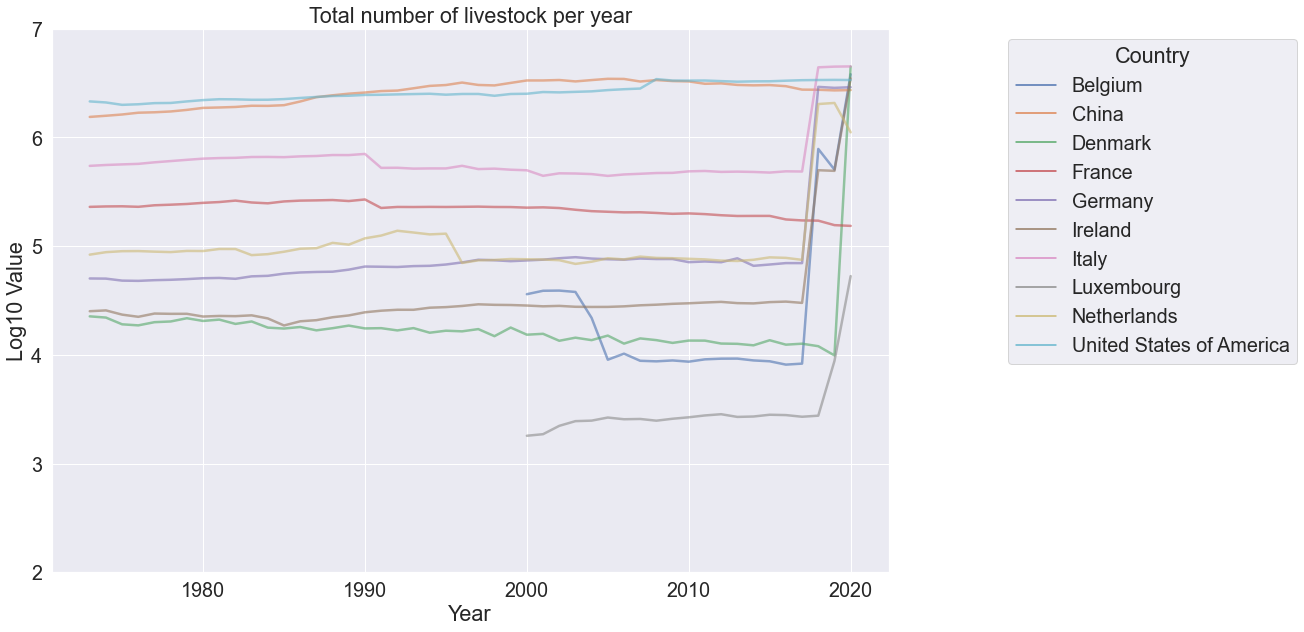

In [96]:
plot_thickens(stock_clean, "Total number of livestock per year", "Year", "Log10 Value",
             2,7)

In [97]:
# Creating a function to compare trends from different countries over time

def plot_thickens2(df, title, xlabel, ylabel, xlim1, xlim2, ylim1, ylim2):
    plt.figure(figsize=(15, 10));
    sns.set(font_scale = 1.8);
    sns.lineplot(data = df, x='Year', y="LogValue", hue="Area",
                linewidth=2.5, alpha=0.6, ci=None);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), title="Country");
    plt.xlim(xlim1, xlim2)
    plt.ylim(ylim1, ylim2)

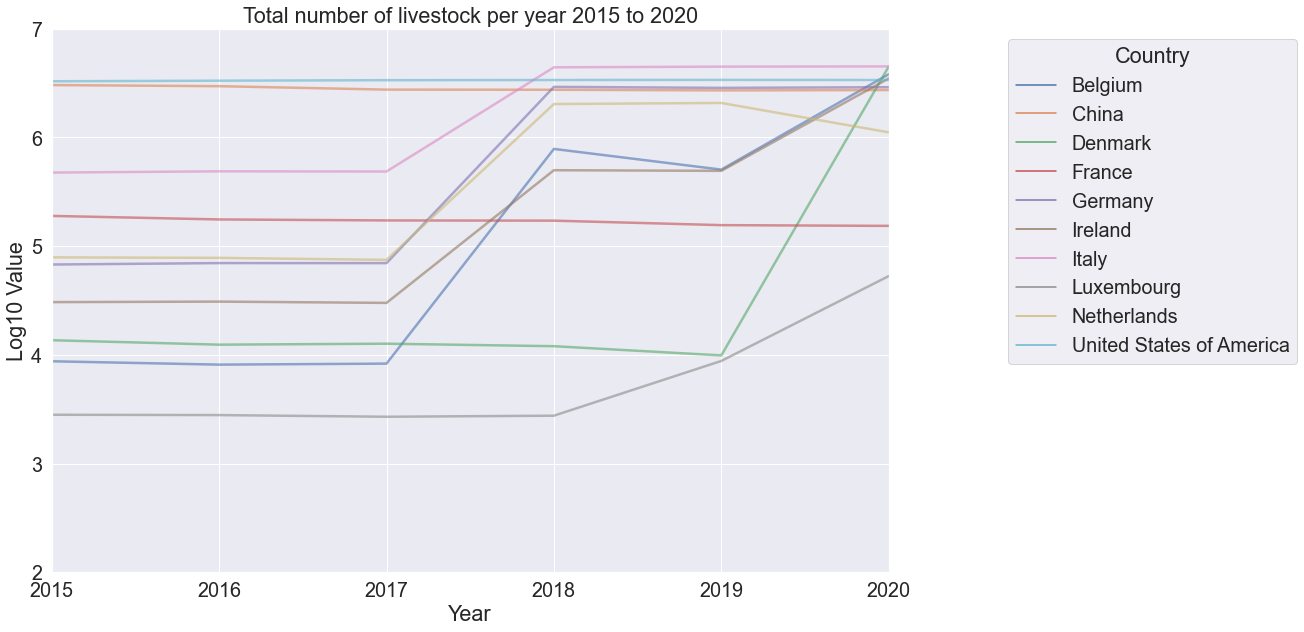

In [98]:
plot_thickens2(stock_clean, "Total number of livestock per year 2015 to 2020", "Year", "Log10 Value",
             2015, 2020, 2,7)

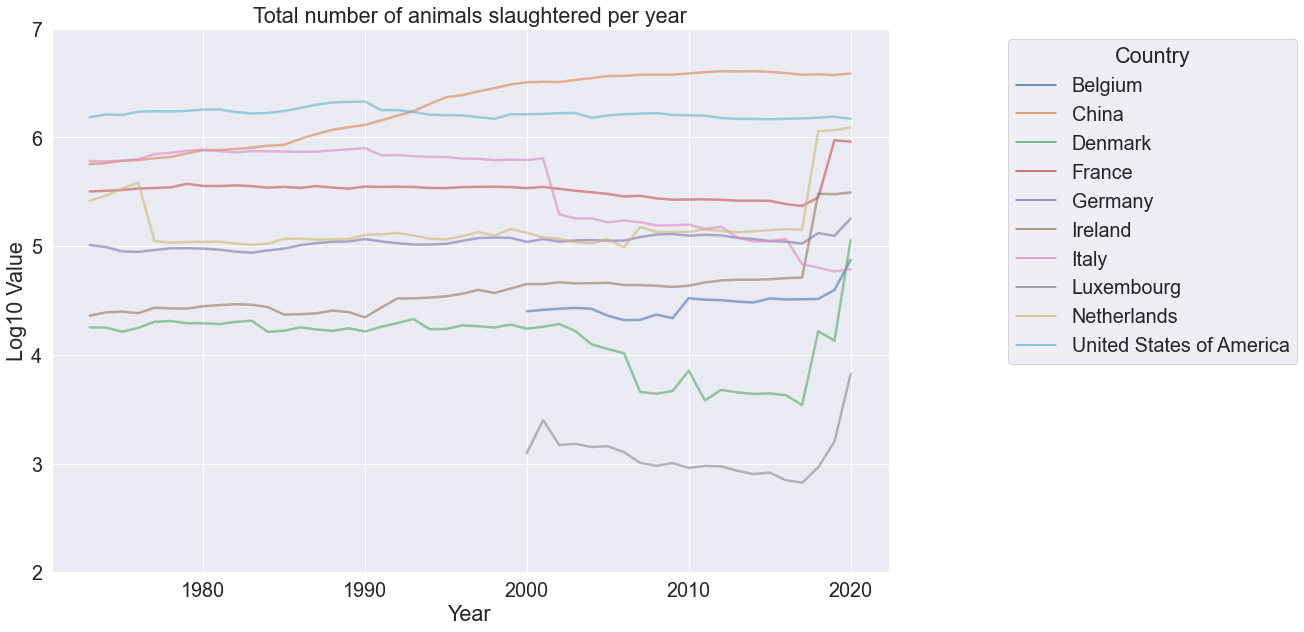

In [99]:
plot_thickens(slaughter_clean, "Total number of animals slaughtered per year", "Year", "Log10 Value",
             2,7)

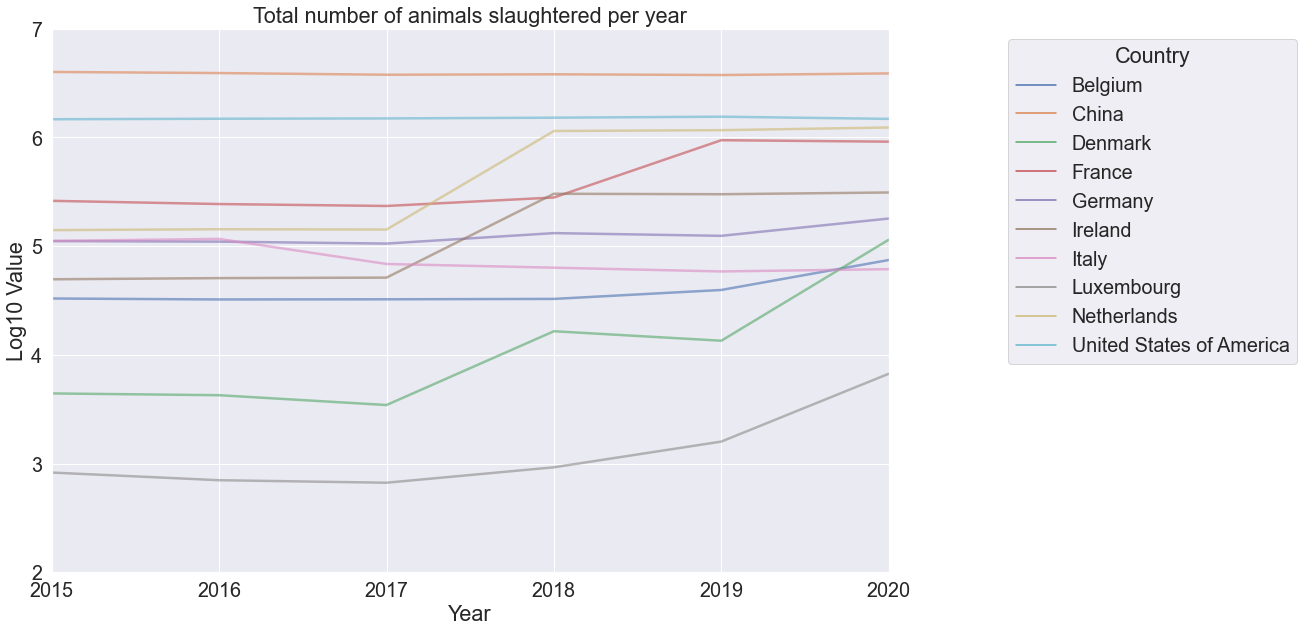

In [100]:
plot_thickens2(slaughter_clean, "Total number of animals slaughtered per year", "Year", "Log10 Value",
             2015, 2020, 2,7)

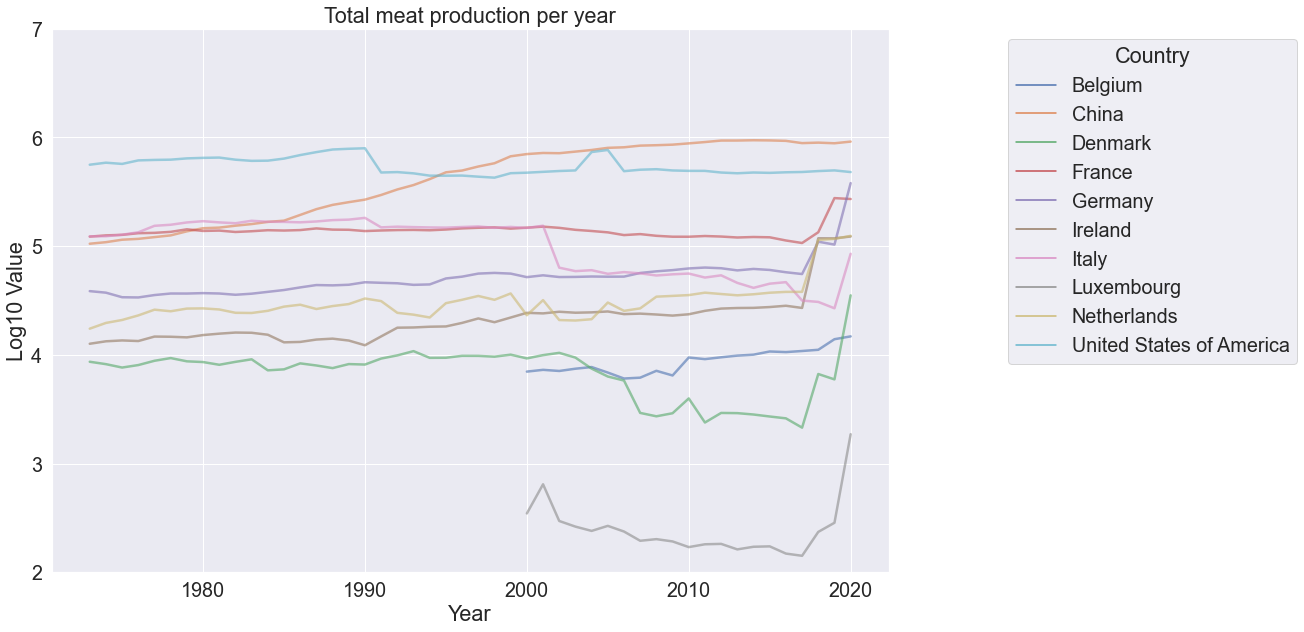

In [101]:
plot_thickens(meat_clean, "Total meat production per year", "Year", "Log10 Value",
             2,7)

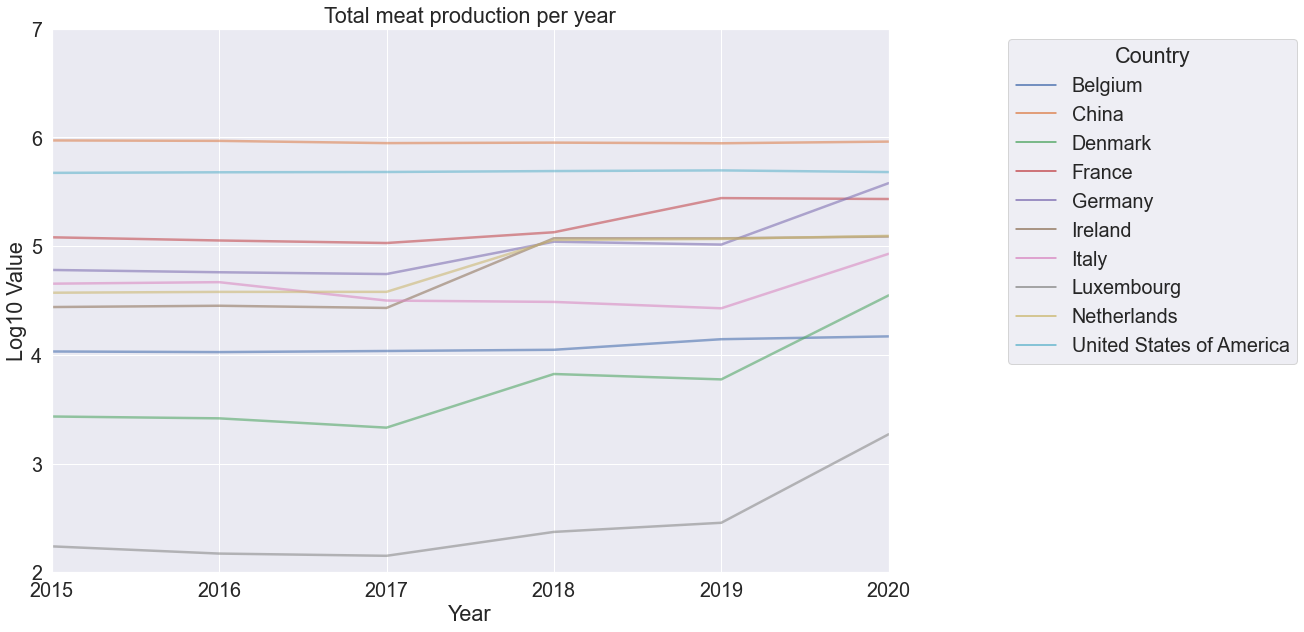

In [102]:
plot_thickens2(meat_clean, "Total meat production per year", "Year", "Log10 Value",
             2015, 2020, 2,7)

## Animals Slaughtered per year

### Cattle

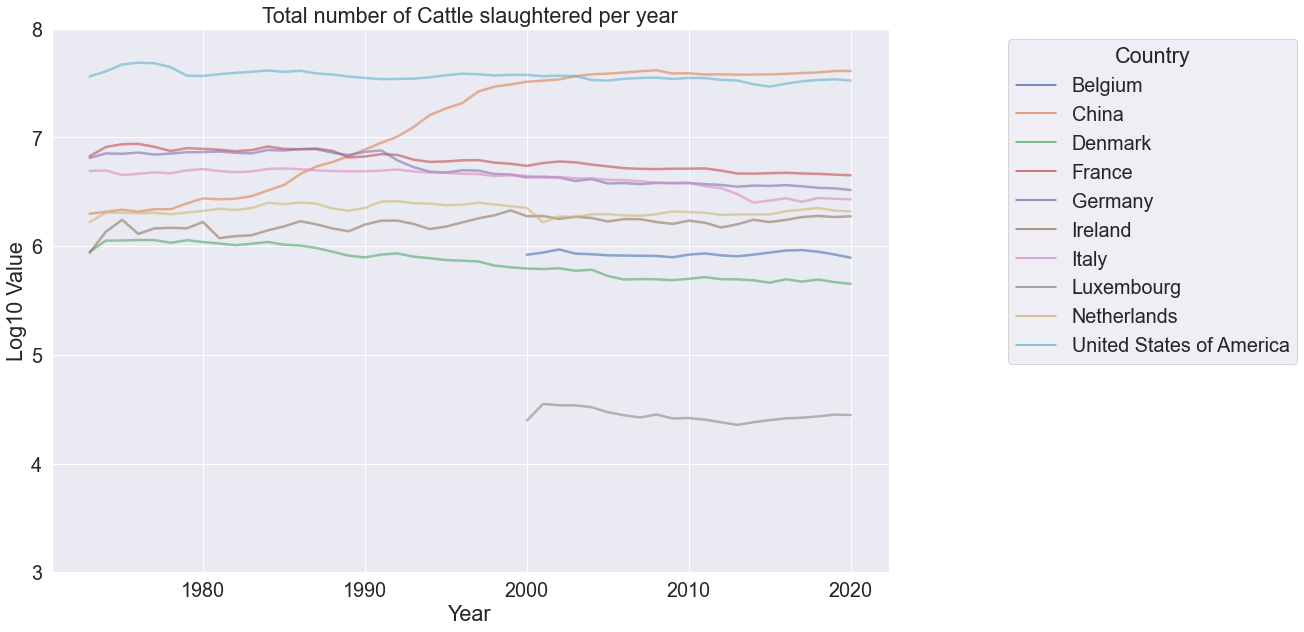

In [103]:
plot_thickens(slaughter_clean.loc[(slaughter_clean['Item'] == "Cattle")],
              "Total number of Cattle slaughtered per year", "Year", "Log10 Value",
             3,8)

### Sheep

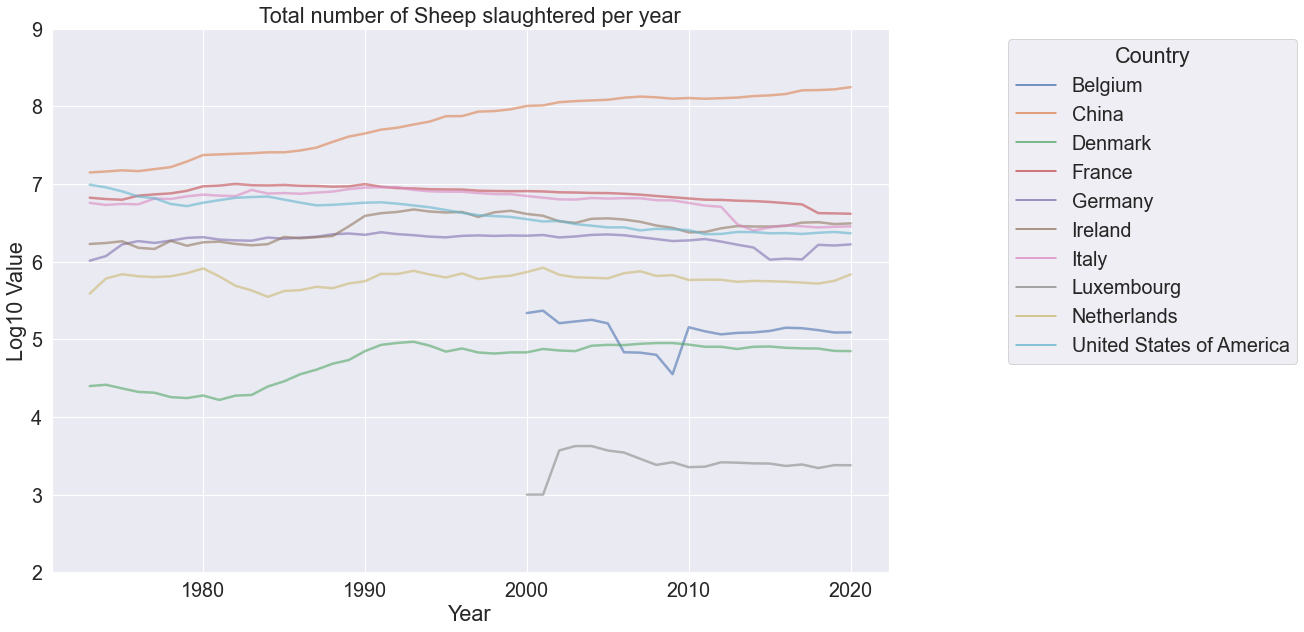

In [104]:
plot_thickens(slaughter_clean.loc[(slaughter_clean['Item'] == "Sheep")],
              "Total number of Sheep slaughtered per year", "Year", "Log10 Value",
             2,9)

### Pigs

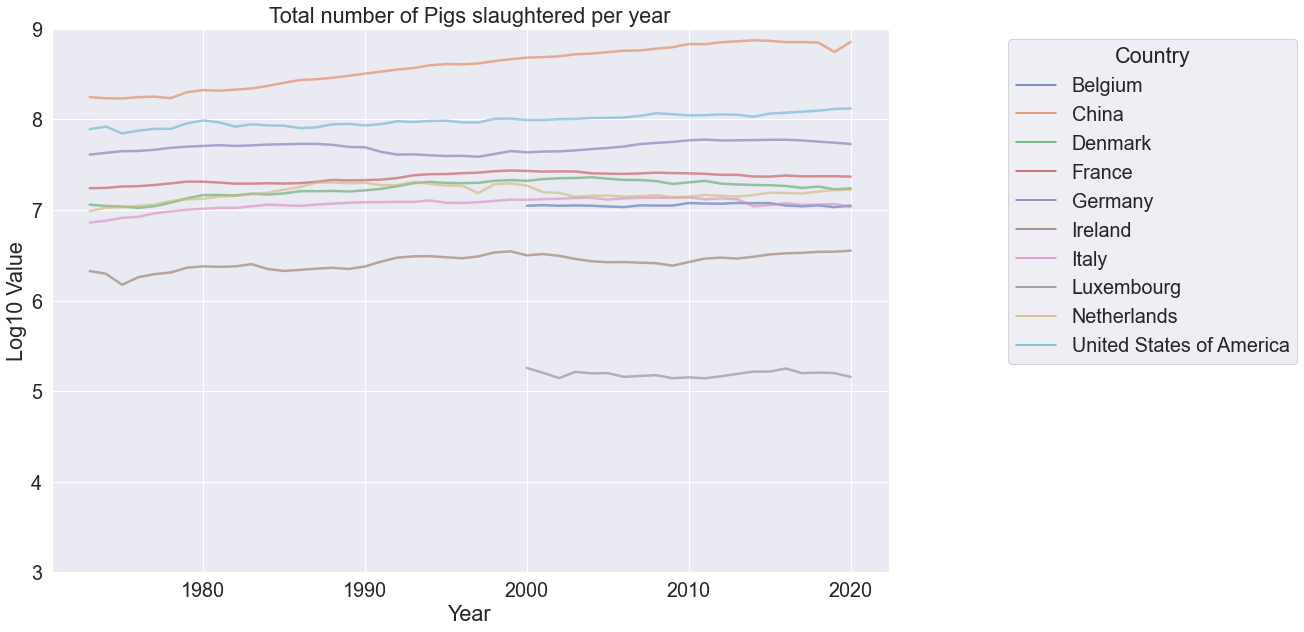

In [105]:
plot_thickens(slaughter_clean.loc[(slaughter_clean['Item'] == "Pig")],
              "Total number of Pigs slaughtered per year", "Year", "Log10 Value",3,9)

## Meat produced

### Cattle

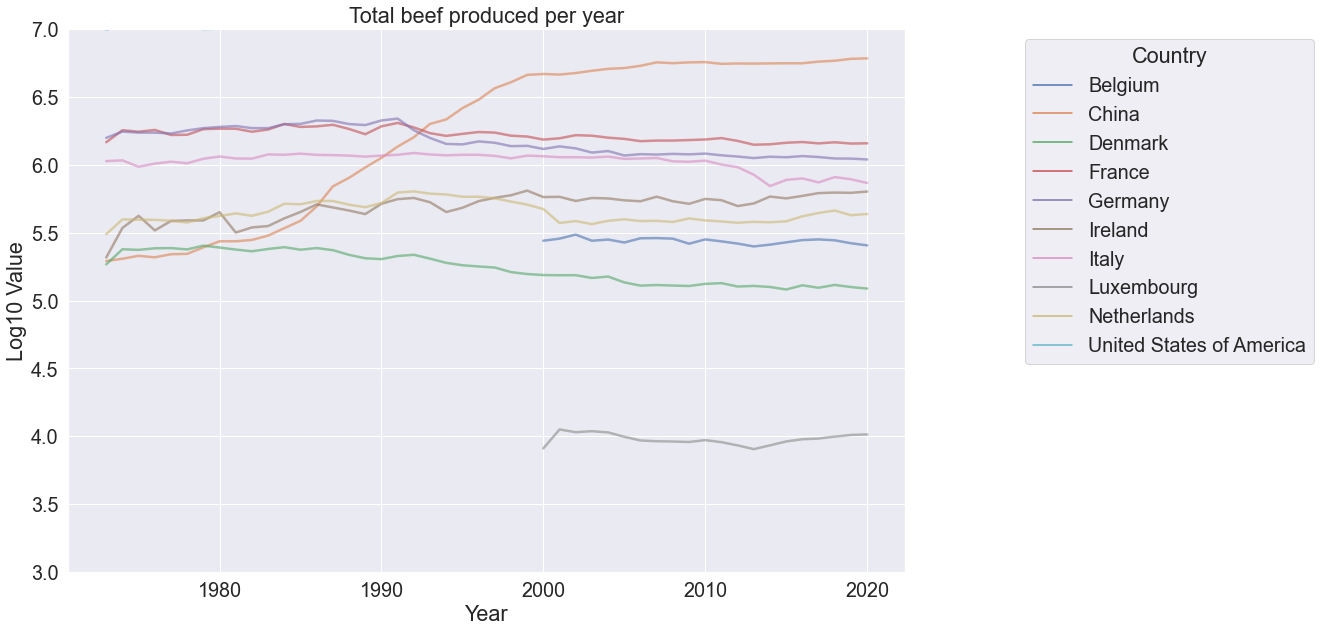

In [106]:
plot_thickens(meat_clean.loc[(meat_clean['Item'] == "Cattle")],
              "Total beef produced per year", "Year", "Log10 Value",3,7)

### Mutton

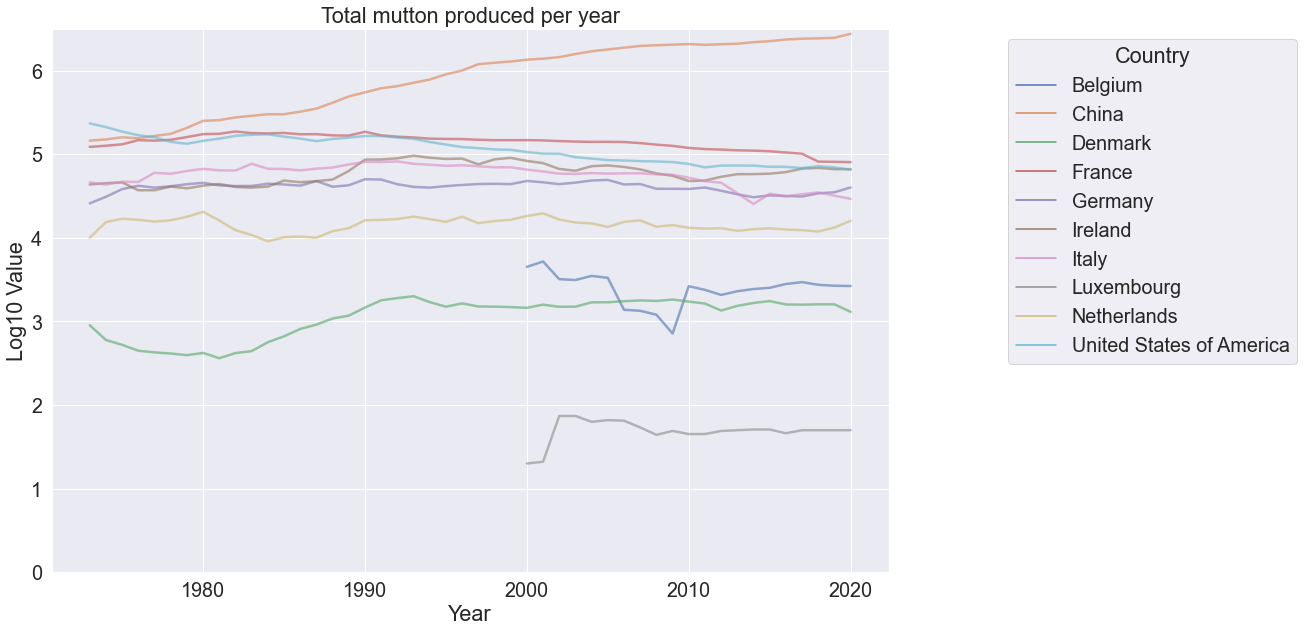

In [107]:
plot_thickens(meat_clean.loc[(meat_clean['Item'] == "Sheep")],
              "Total mutton produced per year", "Year", "Log10 Value",0,6.5)

### Pork

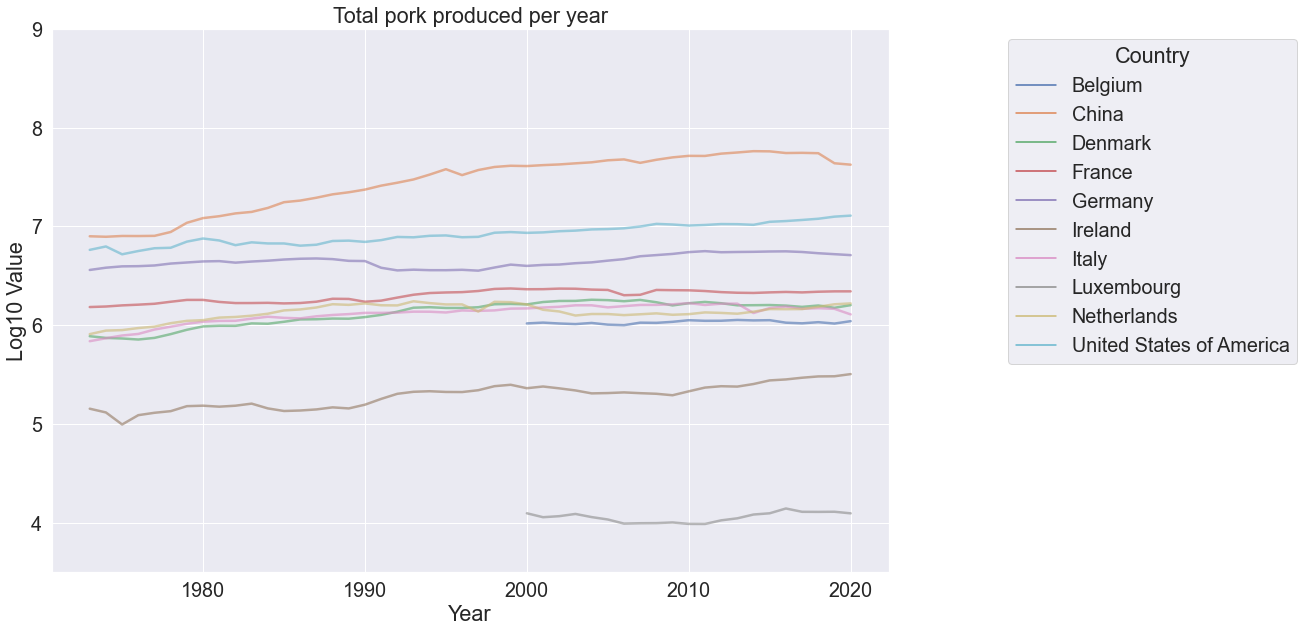

In [108]:
plot_thickens(meat_clean.loc[(meat_clean['Item'] == "Pig")],
              "Total pork produced per year", "Year", "Log10 Value",3.5,9)

# Statistical analysis 

In [109]:
# Creation of a function to create QQ plots to visualise distributions
# Includes R-squared to measure the line fit
import pingouin as pg

def see_normality(dataframe):
    '''This function takes a dataframe as input and plots the normality on 
    a QQ plot, it also gives the r2 squared value which measures line fit'''
    ax = pg.qqplot(dataframe, dist='norm', figsize=(10,10))
    sns.set(font_scale = 1.4); 

## Testing normality of the distributions

### Animal Slaughter data 

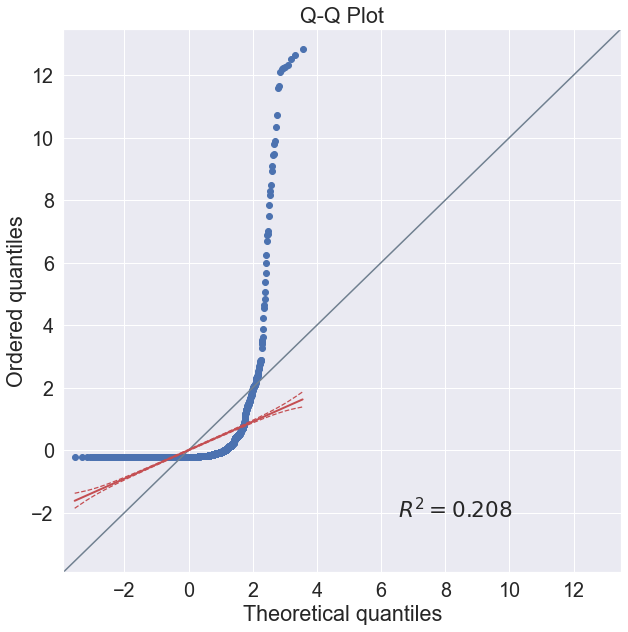

In [110]:
#Normality plot.

see_normality(slaughter_clean.Value)

To compliment the QQ plot, next we perform a Shapiro-Wilks test to statistically confirm if the distribution is normal or non-normal.

<b>The null hypothesis (H0) for the Shapiro-Wilk test is that "a variable is normally distributed in a population".</b>

In [111]:
# Performing a Shapiro wilks test to confirm the data if the data is or is not
# normally distributed.

stats.shapiro(slaughter_clean.Value)

ShapiroResult(statistic=0.20885485410690308, pvalue=0.0)

The QQ plot does not show a linear plot typically associated with normal distributions. In addition, the Shapiro-Wilks test
has a p-value below 0.05 so we reject the null hypothesis that "the variable is normally distributed"

Thus, we conclude the distribution of the animal slaughter data is non-normal.

### Meat production data 

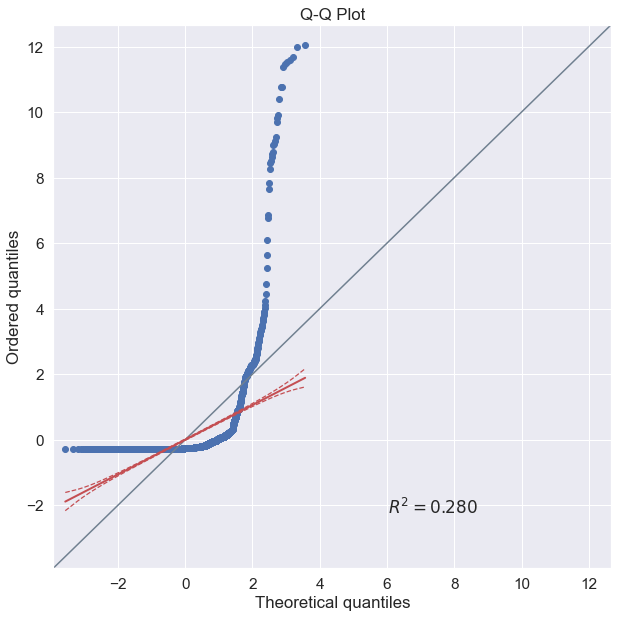

In [112]:
see_normality(meat_clean.Value)

In [113]:
stats.shapiro(meat_clean.Value)

ShapiroResult(statistic=0.2809247374534607, pvalue=0.0)

The QQ plot does not show a linear plot typically associated with normal distributions. In addition, the Shapiro-Wilks test
has a p-value below 0.05 so we reject the null hypothesis that "the variable is normally distributed"

Thus, we conclude the distribution of the meat production data is non-normal.

### Livestock stocking data 

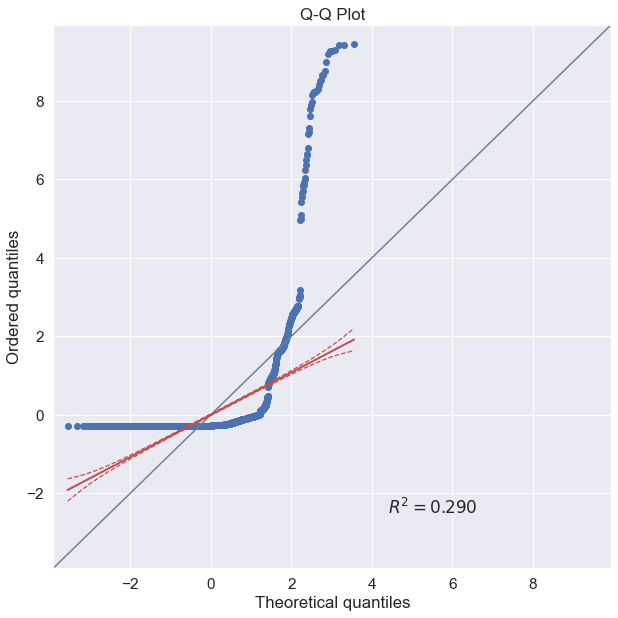

In [114]:
see_normality(stock_clean.Value)

In [115]:
stats.shapiro(stock_clean.Value)

ShapiroResult(statistic=0.29074954986572266, pvalue=0.0)

The QQ plot does not show a linear plot typically associated with normal distributions. In addition, the Shapiro-Wilks test
has a p-value below 0.05 so we reject the null hypothesis that "the variable is normally distributed"

Thus, we conclude the distribution of the livestock stocking data is non-normal.

### Import export data

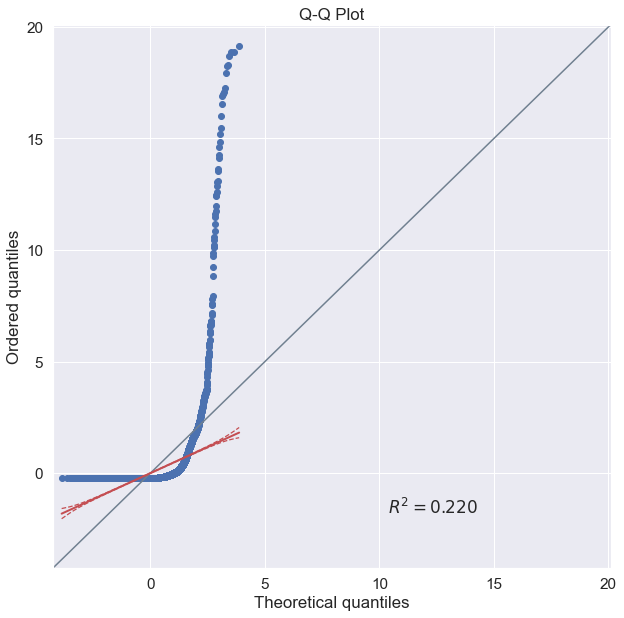

In [116]:
see_normality(imp_exp_clean.Value)

In [117]:
stats.shapiro(imp_exp_clean.Value)

ShapiroResult(statistic=0.22003084421157837, pvalue=0.0)

The QQ plot does not show a linear plot typically associated with normal distributions. In addition, the Shapiro-Wilks test
has a p-value below 0.05 so we reject the null hypothesis that "the variable is normally distributed"

Thus, we normally we would conclude the distribution of the import export data is non-normal.

However, the Scipy stats module has given a warning that the Shapiro-Wilks test 'p-value may not be accurate for datasets containing n > 5,000'. Therefore, we can perform an additional Kolmogorov-Smirnov test (KS-test) to test for normality. 

In addition, we shall test if this is a problem for the other datasets using count().

In [118]:
# Checking all the data sets to see if the >5,000 observations issue affects 
# any data set other than the import / export data
print(f"The animal slaughter dataset count is \n{slaughter_clean.count()}")
print(f"The meat production dataset count is \n{meat_clean.count()}")
print(f"The livestock stocking dataset count is \n{stock_clean.count()}")
print(f"The import export dataset count is \n{imp_exp_clean.count()}")

The animal slaughter dataset count is 
Area        3625
Element     3625
Item        3625
Year        3625
Unit        3625
Value       3625
LogValue    3625
dtype: int64
The meat production dataset count is 
Area        3830
Element     3830
Item        3830
Year        3830
Unit        3830
Value       3830
LogValue    3830
dtype: int64
The livestock stocking dataset count is 
Area        3670
Element     3670
Item        3670
Year        3670
Unit        3670
Value       3670
LogValue    3670
dtype: int64
The import export dataset count is 
Area        12988
Element     12988
Item        12988
Year        12988
Unit        12988
Value       12988
LogValue    12988
dtype: int64


This confirms only the import export data set is too large for the Shapiro Wilks test. Next we can use the Kolmogorov-Smirnov test (KS-test) to re-test the normality of the larger import export data set.

In [119]:
from scipy.stats import kstest, norm
ks_statistic, p_value = kstest(imp_exp_clean.Value, 'norm')
print(ks_statistic, p_value)

0.9836362430216499 0.0


The KS-test confirms the Shapiro-Wilks and QQ plot results that the import export data is not normally distributed.

### Summary of distribution testing 

The distribution of all four imported datasets (slaughter, meat production, livestock, and import/export) is not normal as demonstrated by their QQ plots and the results of the Shapiro-Wilks tests. All four datasets Shapiro-Wilks tests had p value below 0.05 and rejected the Null Hypothesis that the "data is evenly distributed". In addition, as the import_export dataset was too large for an accurate  Shapiro-Wilks (SW) normality test, a KS-test was performed to confirm the distribution results observed by the SW test and the QQ plot. The KS-test confirmed the import export data is also non-normally distributed.

Therefore, we can conclude all four data sets have a non-normal distribution. 

This means data sets cannot be analysed by tests that require a normal distribution. For example, a T-test, ANOVA, Pearson correlation or Linear regression will not be suitable as these require the data to be normally distributed. We must use tests that are appropriate to non-normally distributed data. 

## Data preparation for hypothesis testing

For Statistical analysis I intend to compare if there is any difference between Ireland and other European countries in addition to the US and China in animals slaughtered, meat production and livestock stocking densities.


### Taking a subset of the data

Due to the large size of the data set,  a subset of animals and countries shall be selected for statistical analysis. In addition, comparisons will only be performed between the slaughter data and the meat production datasets.

The subsets shall include:

Animals = "Cattle", "Chicken", "Pig", "Sheep"

Countries = "Ireland", "France", "Germany", "Italy", "Netherlands", "China", "USA"

In [120]:
# Creating a function to subset the data sets

def stat_subset(dataframe):
    df = dataframe.loc[(dataframe['Item'] == "Cattle")| 
                                      (dataframe['Item'] == "Chicken")|
                                      (dataframe['Item'] == "Pig")|
                                      (dataframe['Item'] == "Sheep")]
    df = df.loc[(df['Area'] == "Ireland")|
                        (df['Area'] == "France")|
                        (df['Area'] == "Germany")|
                        (df['Area'] == "Italy")|
                        (df['Area'] == "Netherlands")|
                        (df['Area'] == "China")|
                        (df['Area'] == "United States of America")]
    return df

In [121]:
slaughter_subset = stat_subset(slaughter_clean)
meat_subset = stat_subset(meat_clean)
livestock_subset = stat_subset(stock_clean)

In [122]:
# Testing that the dataframes have been properly subsetted by the function

print(f"Slaughter countries:{slaughter_subset.Item.unique()}\n")
print(f"Slaughter animals:{slaughter_subset.Area.unique()}\n")
print(f"Meat production countries:{meat_subset.Item.unique()}\n")
print(f"Meat production animals:{meat_subset.Area.unique()}\n")
print(f"Livestock countries:{livestock_subset.Item.unique()}\n")
print(f"Livestock animals:{livestock_subset.Area.unique()}\n")

Slaughter countries:['Cattle' 'Chicken' 'Pig' 'Sheep']

Slaughter animals:['China' 'France' 'Germany' 'Ireland' 'Italy' 'Netherlands'
 'United States of America']

Meat production countries:['Cattle' 'Chicken' 'Pig' 'Sheep']

Meat production animals:['China' 'France' 'Germany' 'Ireland' 'Italy' 'Netherlands'
 'United States of America']

Livestock countries:['Cattle' 'Chicken' 'Pig' 'Sheep']

Livestock animals:['China' 'France' 'Germany' 'Ireland' 'Italy' 'Netherlands'
 'United States of America']



### Pivoting the dataframes

In order to carry out the statistical analysis of Ireland versus other countries, the data first needs to be pivoted to so that each countries values are contained in a column


Creating a function to pivot the subsetted datasets so that each countries
values are in their own column

def make_pivot(dataframe):
    x = pd.pivot_table(data=dataframe, index=["Item", "Year"], values="Value", columns="Area")
    return x

In [123]:
# Creating a function to pivot the subsetted datasets so that each countries
# values are in their own column

def make_pivot(dataframe):
    '''This function takes a data frame as input, and then pivots the df so that each
    countrys values are within their own column with animal and year in the rows as index.'''
    x = pd.pivot_table(data=dataframe, index=["Year","Item"], values="Value", columns=["Area",])
    return x

In [124]:
# Placing each countries value inside a column

slaughter_stats = make_pivot(slaughter_subset)
meat_stats = make_pivot(meat_subset)
livestock_stats = make_pivot(livestock_subset)

# Checking the column order
slaughter_stats.head()

Area                China      France     Germany    Ireland      Italy  \
Year Item                                                                 
1973 Cattle     1987666.0   6725000.0   6467844.0   869900.0  4917800.0   
     Chicken     747639.0    429658.0    351731.0    24300.0   493000.0   
     Pig      175836294.0  17352000.0  40791840.0  2111000.0  7245000.0   
     Sheep     14100025.0   6660000.0   1029000.0  1690000.0  5709000.0   
1974 Cattle     2070484.0   8164000.0   7130642.0  1358000.0  4969751.0   

Area          Netherlands  United States of America  
Year Item                                            
1973 Cattle     1667141.0                36402000.0  
     Chicken     282500.0                 3252090.0  
     Pig        9695142.0                77890000.0  
     Sheep       388012.0                 9799000.0  
1974 Cattle     2033582.0                40499008.0

In [125]:
slaughter_stats.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 192 entries, (1973, 'Cattle') to (2020, 'Sheep')
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   China                     192 non-null    float64
 1   France                    192 non-null    float64
 2   Germany                   192 non-null    float64
 3   Ireland                   192 non-null    float64
 4   Italy                     192 non-null    float64
 5   Netherlands               192 non-null    float64
 6   United States of America  192 non-null    float64
dtypes: float64(7)
memory usage: 11.4+ KB


### Re-ordering the columns

In [126]:
# reordering the new columns so that Ireland followed by EU countries are first, then China and
# the United States of America

columns =["Ireland", "France", "Germany", "Italy", "Netherlands", "China", "United States of America"]

slaughter_stats = slaughter_stats.reindex(columns=columns)
meat_stats = meat_stats.reindex(columns=columns)
livestock_stats = livestock_stats.reindex(columns=columns)

# Testing the re-order worked
slaughter_stats.head()

Area            Ireland      France     Germany      Italy  Netherlands  \
Year Item                                                                 
1973 Cattle    869900.0   6725000.0   6467844.0  4917800.0    1667141.0   
     Chicken    24300.0    429658.0    351731.0   493000.0     282500.0   
     Pig      2111000.0  17352000.0  40791840.0  7245000.0    9695142.0   
     Sheep    1690000.0   6660000.0   1029000.0  5709000.0     388012.0   
1974 Cattle   1358000.0   8164000.0   7130642.0  4969751.0    2033582.0   

Area                China  United States of America  
Year Item                                            
1973 Cattle     1987666.0                36402000.0  
     Chicken     747639.0                 3252090.0  
     Pig      175836294.0                77890000.0  
     Sheep     14100025.0                 9799000.0  
1974 Cattle     2070484.0                40499008.0

### Dealing with NAN's created by pivoting

Testing the new dataframes for null values created by the pivot table function

In [127]:
calc_percent_missing(slaughter_stats.isnull().sum(), len(slaughter_stats))

The percentage of missing values is:
Area
Ireland                     0.0
France                      0.0
Germany                     0.0
Italy                       0.0
Netherlands                 0.0
China                       0.0
United States of America    0.0
dtype: float64


In [128]:
calc_percent_missing(meat_stats.isnull().sum(), len(meat_stats))

The percentage of missing values is:
Area
Ireland                     0.0
France                      0.0
Germany                     0.0
Italy                       0.0
Netherlands                 0.0
China                       0.0
United States of America    0.0
dtype: float64


The pivot_table has not introduced any null values in the meat or slaughter dataframes.

In [129]:
livestock_stats.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 192 entries, (1973, 'Cattle') to (2020, 'Sheep')
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ireland                   189 non-null    float64
 1   France                    192 non-null    float64
 2   Germany                   189 non-null    float64
 3   Italy                     189 non-null    float64
 4   Netherlands               190 non-null    float64
 5   China                     192 non-null    float64
 6   United States of America  192 non-null    float64
dtypes: float64(7)
memory usage: 11.4+ KB


In [130]:
calc_percent_missing(livestock_stats.isnull().sum(), len(livestock_stats))

The percentage of missing values is:
Area
Ireland                     1.56
France                      0.00
Germany                     1.56
Italy                       1.56
Netherlands                 1.04
China                       0.00
United States of America    0.00
dtype: float64


Four countries have approximately 1% to 1.5% missing values in the livestock data. As this is such a small %, I will drop the missing values as this will introduce minimal error.

In [131]:
#Filtering out Zeros and NaN's

livestock_stats = livestock_stats.dropna()

In [132]:
# Testing the NaN's have been dropped

calc_percent_missing(livestock_stats.isnull().sum(), len(livestock_stats))

The percentage of missing values is:
Area
Ireland                     0.0
France                      0.0
Germany                     0.0
Italy                       0.0
Netherlands                 0.0
China                       0.0
United States of America    0.0
dtype: float64


## Five statistic summaries for each country

In [133]:
slaughter_stats.describe()

Area,Ireland,France,Germany,Italy,Netherlands,China,United States of America
count,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02
mean,1.823458e+06,9.400710e+06,1.432396e+07,5.695022e+06,4.699347e+06,1.346251e+08,3.659682e+07
std,1.263665e+06,8.400309e+06,2.073453e+07,4.256959e+06,6.506169e+06,2.009695e+08,3.863719e+07
min,2.120000e+04,4.296580e+05,3.120000e+05,3.721900e+05,2.483300e+05,7.476390e+05,2.257500e+06
25%,6.781240e+05,3.337633e+06,9.385325e+05,2.027303e+06,5.410750e+05,6.943555e+06,5.554976e+06
50%,1.804500e+06,7.010488e+06,2.837941e+06,4.961246e+06,1.246500e+06,3.781689e+07,1.955965e+07
75%,2.839600e+06,1.186552e+07,1.550445e+07,8.443314e+06,4.370786e+06,1.700157e+08,5.401450e+07
max,4.701000e+06,2.722100e+07,5.973568e+07,1.376435e+07,2.034500e+07,7.449179e+08,1.316390e+08


It is difficult to view the 5 stat summary as the scales are too large therefore I will convert them to Log10 values and re-view them.

In [134]:
def summary_pivot(dataframe):
    '''This function takes a data frame as input, and then pivots the df so that each
    countrys Logvalues are within their own column with animal and year in the rows as index.'''
    x = pd.pivot_table(data=dataframe, index=["Year","Item"], values="LogValue", columns=["Area",])
    return x

In [135]:
Slaughter_summary = summary_pivot(slaughter_clean)
Livestock_summary = summary_pivot(stock_clean)
Meat_summary = summary_pivot(meat_clean)
imp_exp_summary = summary_pivot(imp_exp_clean)

### Slaughter data - log scale

In [136]:
Slaughter_summary.describe()

Area,Belgium,China,Denmark,France,Germany,Ireland,Italy,Luxembourg,Netherlands,United States of America
count,165.000000,480.000000,379.000000,473.000000,476.000000,375.000000,406.000000,138.000000,367.000000,366.000000
mean,4.462379,6.277452,4.113999,5.518425,5.037488,4.575873,5.518131,3.053614,5.154541,6.218663
std,1.696280,1.650582,1.903278,1.255995,1.436827,1.555448,1.347004,1.351969,1.262121,1.213414
min,0.845098,2.204120,0.000000,2.655138,2.559907,2.204120,0.698970,0.602060,2.883661,4.040998
25%,3.106531,5.507028,3.003439,4.686001,4.142937,3.169069,4.557024,1.838715,3.924563,5.226427
50%,4.800511,6.221016,4.255827,5.689472,4.447816,4.397940,5.677467,2.661787,5.458638,6.382503
75%,5.893568,7.588260,5.658149,6.768342,6.309828,6.258363,6.687411,4.415682,6.276564,7.520971
max,7.076094,8.872108,7.359879,7.434904,7.776234,6.672190,7.138756,5.255434,7.308458,8.119385


### Stocking data - log scale

In [137]:
Livestock_summary.describe()

Area,Belgium,China,Denmark,France,Germany,Ireland,Italy,Luxembourg,Netherlands,United States of America
count,180.000000,480.000000,379.000000,478.000000,462.000000,400.000000,372.000000,142.000000,393.000000,384.000000
mean,4.181800,6.412740,4.216903,5.343182,4.847088,4.466659,5.762802,3.453854,4.977230,6.416044
std,1.834081,1.811912,1.862973,1.494919,1.883409,1.792169,1.084624,1.507552,1.519746,1.280729
min,0.301030,1.908485,0.301030,2.499687,1.397940,1.662758,3.758458,0.301030,2.475671,3.531479
25%,2.371068,5.304481,2.528915,4.306076,3.184235,2.849563,5.000000,2.070820,3.112270,5.831127
50%,4.517637,6.685188,4.308500,5.396949,5.084102,4.180410,5.976097,3.683871,5.008016,6.705222
75%,5.179212,7.991616,6.176091,7.005012,6.467925,6.236317,6.908163,4.916321,6.274620,7.358032
max,6.867381,8.687300,7.137464,7.381603,7.572203,6.878234,7.063281,5.312163,7.156814,8.120666


### Meat production data - log scale

In [138]:
Meat_summary.describe()

Area,Belgium,China,Denmark,France,Germany,Ireland,Italy,Luxembourg,Netherlands,United States of America
count,165.000000,528.000000,424.000000,473.000000,517.000000,375.000000,404.000000,153.000000,379.000000,412.000000
mean,3.936709,5.601484,3.823483,5.136669,4.696979,4.307196,4.975868,2.351899,4.472570,5.732642
std,1.572458,1.168115,1.366738,0.887649,1.202177,0.989633,1.094604,1.197036,1.227563,1.093535
min,0.698970,3.199481,0.301030,3.375481,2.000000,1.690196,1.397940,0.000000,2.238046,3.781899
25%,2.602060,4.998809,2.903090,4.130334,3.839352,3.301030,4.598073,1.447158,3.381259,4.771324
50%,3.716003,5.721526,3.531734,5.185347,4.605973,4.536558,5.215769,2.350248,4.230704,5.384198
75%,5.516850,6.381098,5.165615,6.027067,5.664172,5.125355,5.915492,3.934145,5.679829,6.908554
max,6.053298,7.760889,6.257559,6.439773,6.749433,5.808751,6.223496,4.145569,6.242238,7.311547


In [139]:
imp_exp_summary.describe()

Area,Belgium,China,Denmark,France,Germany,Ireland,Italy,Luxembourg,Netherlands,United States of America
count,168.000000,351.000000,329.000000,384.000000,381.000000,339.000000,382.000000,150.000000,376.000000,357.000000
mean,3.732281,3.719596,2.979667,4.150026,3.970577,3.390716,3.632824,2.287209,4.002272,4.195787
std,1.358658,1.354331,1.091985,1.167618,1.431857,1.209683,1.077961,1.372406,1.251697,1.026621
min,0.725074,0.000000,0.000000,0.644373,0.000000,0.000000,0.610836,0.000000,0.731042,0.811625
25%,2.571082,2.832826,2.360269,3.387231,2.980914,2.771525,2.858317,1.186123,3.059038,3.516858
50%,3.723315,3.567676,3.208667,4.448243,4.176655,3.768737,3.843885,2.277045,4.179602,4.198580
75%,5.102152,4.792263,3.580308,5.162733,5.277928,4.251903,4.356036,3.902034,5.022761,5.086125
max,5.628559,6.022014,6.478927,5.907710,6.400397,5.277354,5.684868,4.645373,6.088912,5.955698


### Max - Min Summaries per country

In [140]:
print(f"The mins of the slaughter data is:\n{Slaughter_summary.min()}\n")
print(f"The maxs of the slaughter data is:\n{Slaughter_summary.max()}\n")

The mins of the slaughter data is:
Area
Belgium                     0.845098
China                       2.204120
Denmark                     0.000000
France                      2.655138
Germany                     2.559907
Ireland                     2.204120
Italy                       0.698970
Luxembourg                  0.602060
Netherlands                 2.883661
United States of America    4.040998
dtype: float64

The maxs of the slaughter data is:
Area
Belgium                     7.076094
China                       8.872108
Denmark                     7.359879
France                      7.434904
Germany                     7.776234
Ireland                     6.672190
Italy                       7.138756
Luxembourg                  5.255434
Netherlands                 7.308458
United States of America    8.119385
dtype: float64



In [141]:
print(f"The mins of the stocking data is:\n{Livestock_summary.min()}\n")
print(f"The maxs of the stocking data is:\n{Livestock_summary.max()}\n")

The mins of the stocking data is:
Area
Belgium                     0.301030
China                       1.908485
Denmark                     0.301030
France                      2.499687
Germany                     1.397940
Ireland                     1.662758
Italy                       3.758458
Luxembourg                  0.301030
Netherlands                 2.475671
United States of America    3.531479
dtype: float64

The maxs of the stocking data is:
Area
Belgium                     6.867381
China                       8.687300
Denmark                     7.137464
France                      7.381603
Germany                     7.572203
Ireland                     6.878234
Italy                       7.063281
Luxembourg                  5.312163
Netherlands                 7.156814
United States of America    8.120666
dtype: float64



In [142]:
print(f"The mins of the meat production data is:\n{Meat_summary.min()}\n")
print(f"The maxs of the meat production data is:\n{Meat_summary.max()}\n")

The mins of the meat production data is:
Area
Belgium                     0.698970
China                       3.199481
Denmark                     0.301030
France                      3.375481
Germany                     2.000000
Ireland                     1.690196
Italy                       1.397940
Luxembourg                  0.000000
Netherlands                 2.238046
United States of America    3.781899
dtype: float64

The maxs of the meat production data is:
Area
Belgium                     6.053298
China                       7.760889
Denmark                     6.257559
France                      6.439773
Germany                     6.749433
Ireland                     5.808751
Italy                       6.223496
Luxembourg                  4.145569
Netherlands                 6.242238
United States of America    7.311547
dtype: float64



In [143]:
print(f"The mins of the imp_exp data is:\n{imp_exp_summary.min()}\n")
print(f"The maxs of the imp_exp data is:\n{imp_exp_summary.max()}\n")

The mins of the imp_exp data is:
Area
Belgium                     0.725074
China                       0.000000
Denmark                     0.000000
France                      0.644373
Germany                     0.000000
Ireland                     0.000000
Italy                       0.610836
Luxembourg                  0.000000
Netherlands                 0.731042
United States of America    0.811625
dtype: float64

The maxs of the imp_exp data is:
Area
Belgium                     5.628559
China                       6.022014
Denmark                     6.478927
France                      5.907710
Germany                     6.400397
Ireland                     5.277354
Italy                       5.684868
Luxembourg                  4.645373
Netherlands                 6.088912
United States of America    5.955698
dtype: float64



## Boxplot of outliers in each dataframe

In [144]:
def myboxplot(xaxis, yaxis, title, xlabel, ylabel):
    '''This function takes dataframe columns and axis
    labels as inputs and generates a boxplot'''
    flierprops = dict(markerfacecolor='0.75', markersize=5,
                  linestyle='none')
    plt.figure(figsize=(21, 10));
    sns.set(font_scale = 1.2);
    sns.boxplot(x=xaxis, y=yaxis,
               flierprops = flierprops);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);

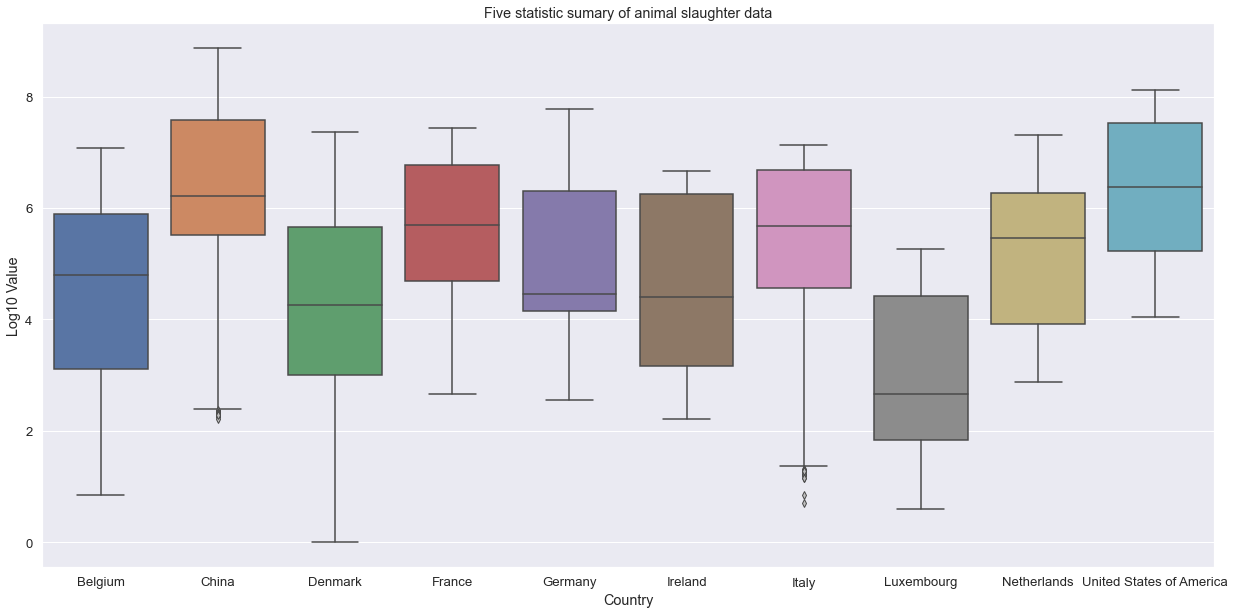

In [145]:
myboxplot(slaughter_clean["Area"],slaughter_clean["LogValue"],"Five statistic sumary of animal slaughter data", "Country",
          "Log10 Value")

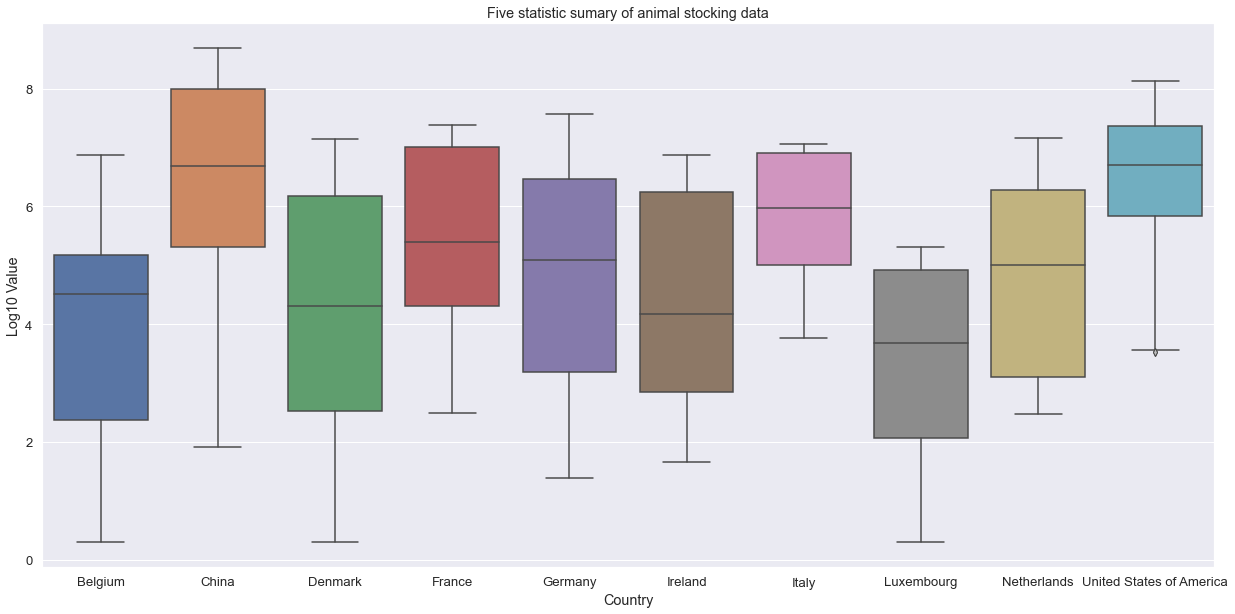

In [146]:
myboxplot(stock_clean["Area"],stock_clean["LogValue"],"Five statistic sumary of animal stocking data", "Country",
          "Log10 Value")

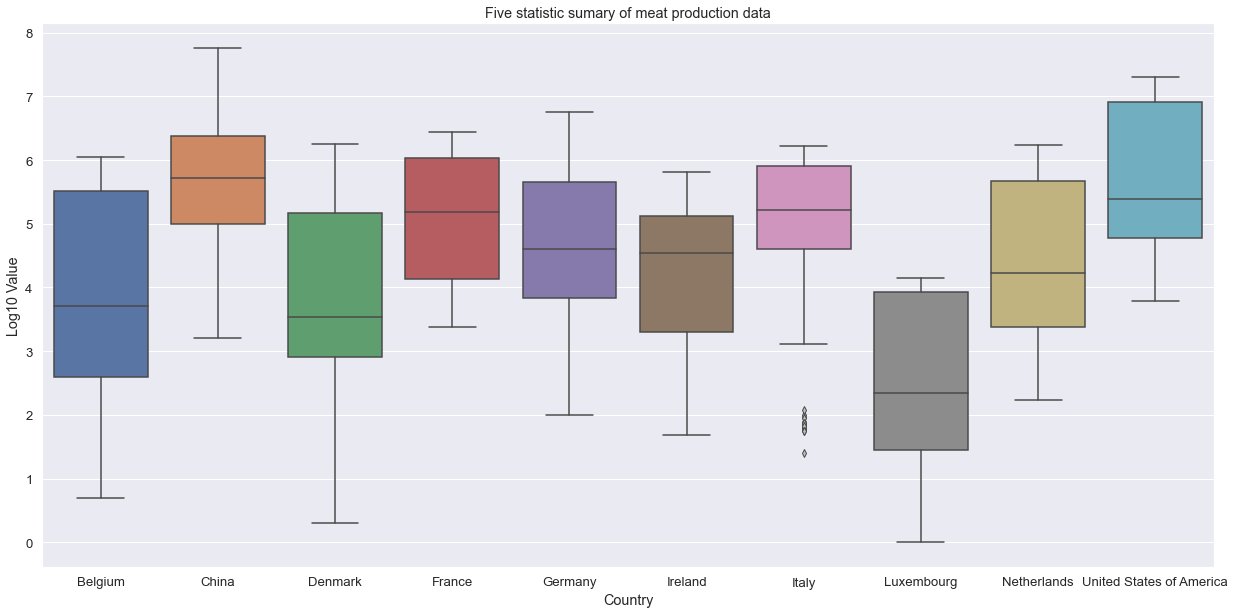

In [147]:
myboxplot(meat_clean["Area"],meat_clean["LogValue"],"Five statistic sumary of meat production data", "Country",
          "Log10 Value")

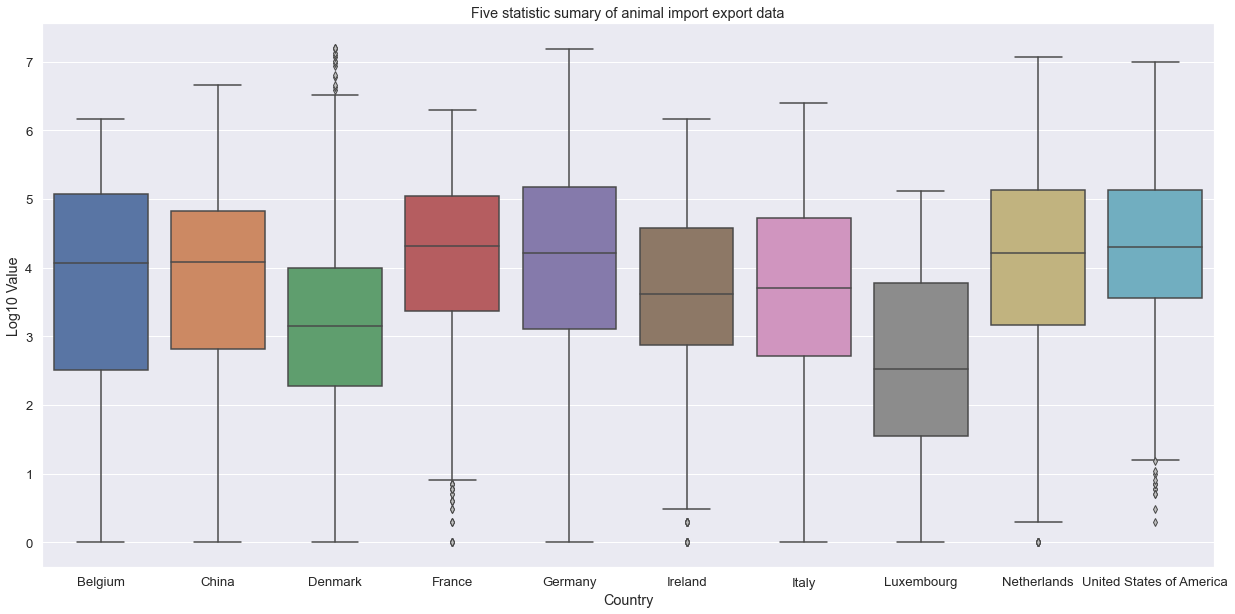

In [148]:
myboxplot(imp_exp_clean["Area"],imp_exp_clean["LogValue"],"Five statistic sumary of animal import export data", "Country",
          "Log10 Value")

## Kruskal-Wallis Test

In order to compare Ireland to the other countries listed in the four datasets a Kruskal-Wallis (KW) test was selected for the following reasons:

- All datasets have non-normal distributions
- Each of the datasets has more than two groups.
- The value parameter is ordinal
- The scale is the same in all the samples
- The samples (countries) are independent of each other
- The unit of measurement of all countries in the datasets are the same
- We do not need to assume homogeneity between the variables, so the level of variance does not need to be tested.

The Null Hypothesis for the Kruskall-Wall test is:

<b> H0: The population median of all the groups tested is equal </b>

In [149]:
# Creation of a function to perform a Kruskal Wallis test comparing all countries
# in the dataframe

def krusk(df):
    '''This function takes a dataframe as input, and then performs a Kruskall-
    Wallis test between Ireland and six other countries and prints the result'''
    result = stats.kruskal(df.Ireland, df.France, df.Germany, df.Italy, df.Netherlands,
                  df.China, df['United States of America'])
    if result.pvalue <= 0.05:
        print(f"The p-value is {result.pvalue}, the null hypothesis is rejected")
        print(result)
    else:
        print(f"The p-value is {result.pvalue}, the null hypothesis is accepted")
        print(result)

### Test 1: Comparing the total slaughter of 'cattle, pigs, chickens and sheep' between all countries

In [150]:
krusk(slaughter_stats)

The p-value is 4.934261552794357e-96, the null hypothesis is rejected
KruskalResult(statistic=459.28111693570287, pvalue=4.934261552794357e-96)


The null hypothesis was rejected by the KW test so the median slaughter values for 'Cattle, chickens, pigs and sheep' of these countries is not equal.

### Test 2 Comparing the total meat production of 'cattle, pigs, chickens and sheep' between all countries

In [151]:
krusk(meat_stats)

The p-value is 1.7338116519998716e-100, the null hypothesis is rejected
KruskalResult(statistic=479.96904501046214, pvalue=1.7338116519998716e-100)


The null hypothesis was rejected by the KW test so the median of total meat production of 'cattle, pigs, chickens and sheep' between these countries is not equal.

### Test 3 Comparing the total livestock numbers of 'cattle, pigs, chickens and sheep' between all countries

In [152]:
krusk(livestock_stats)

The p-value is 8.090650781475436e-91, the null hypothesis is rejected
KruskalResult(statistic=435.0504216612527, pvalue=8.090650781475436e-91)


The null hypothesis was rejected by the KW test so the median of animal stocking densities of 'cattle, pigs, chickens and sheep' between these countries is not equal.

## U-Mann Whitmann test

While the Kruskal-Wallis Test was appropriate to compare all countries totals for animals slaughtered and meat production, it only tells us if the median of the group(s) tested are equal or not. It does not allow us to compare two countries on a case by case basis.

Therefore, if we wanted to compare Ireland to the other countries individually, a U-Mann Whitney test can be used. In addition, as there are four animal types in both datasets ("Cattle, chickens, pigs and sheep), we can also compare by each animal between Ireland and another country. This will give a more detailed breakdown of how Ireland compares to other countries on the production and slaughter of individual animal species.

In order to compare Ireland to the other countries listed in the four datasets a U-Mann Whitman (Mann Whitney) test was selected for the following reasons:

- All datasets have non-normal distributions
- The value parameter is ordinal
- The samples (countries) are independent of each other
- The unit of measurement of all countries in the datasets are the same
- We do not need to assume homogeneity between the variables, so the level of variance does not need to be tested.
- Here we are comparing Ireland versus one other country (2 groups)

The Null Hypothesis for the Mann Witney test is:

<b> H0: The probability is 50% that a randomly drawn member of the first population will exceed a member of the second population </b>

In [153]:
from scipy.stats import mannwhitneyu

# creation of a function to perform a mann whitney test on Ireland versus
# the other countries in the dataframe and print the result

def manw(df):
    '''This function takes a dataframe as input, loops through all the countries
    in the dfcolumns and does a mann whitney versus Irelands data'''
    for country in df.iloc[:,:]:
        if country != "Ireland":
            result = mannwhitneyu(df.Ireland, df[country])
            if result.pvalue <= 0.05:
                print(f"The p-value for Ireland vs {country} is {result.pvalue}, the null hypothesis is rejected")
                print(f"round{result}\n")
            else:
                print(f"The p-value for Ireland vs {country} is {result.pvalue}, the null hypothesis is accepted")
                print(f"{result}\n")

### Slaughter data

#### Tests 4 to 9: Comparison of total animals slaughtered between Ireland and other countries

In [154]:
manw(slaughter_stats)

The p-value for Ireland vs France is 4.0920354213501657e-26, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=6936.0, pvalue=4.0920354213501657e-26)

The p-value for Ireland vs Germany is 1.7915338692715844e-10, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=11495.0, pvalue=1.7915338692715844e-10)

The p-value for Ireland vs Italy is 2.130273414931085e-22, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=7844.0, pvalue=2.130273414931085e-22)

The p-value for Ireland vs Netherlands is 0.35951070953366304, the null hypothesis is accepted
MannwhitneyuResult(statistic=17435.0, pvalue=0.35951070953366304)

The p-value for Ireland vs China is 2.3541701458171394e-44, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=3238.0, pvalue=2.3541701458171394e-44)

The p-value for Ireland vs United States of America is 1.1104926567790573e-55, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1336.0, pvalue=1.1104926567

#### Tests 10 to 15: Comparison of total cattle slaughtered between Ireland and other countries

In [155]:
# Creating a function to perform an Mann Whitney on Ireland versus other countries 
# data for specific animals

def animal_manw(dataframe, animal):
    '''This function takes a dataframe and animal name as input and then
    filters out the specific animal into a new dataframe for all countries.
    The function then passes this new dataframe into my Mann Whitney function'''
    columns =["Ireland", "France", "Germany", "Italy", "Netherlands", "China", "United States of America"]
    '''This function takes a dataframe and animal name as input and then
    filters out the specific animal into a new dataframe for all countires.
    The function then pivots this new dataframe so that it can be analysed 
    via Mann Whitney'''
    df = dataframe.loc[(dataframe['Item'] == animal)]
    df = make_pivot(df)
    df = df.reindex(columns=columns)
    df = df.dropna(axis = 0) # This drop has been added as the pivot creates 3 NaN values for Chickens
    manw(df)

In [156]:
animal_manw(slaughter_subset, 'Cattle')

The p-value for Ireland vs France is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Germany is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Italy is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Netherlands is 5.829207045216664e-15, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=86.0, pvalue=5.829207045216664e-15)

The p-value for Ireland vs China is 3.902798734084917e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=3.0, pvalue=3.902798734084917e-17)

The p-value for Ireland vs United States of America is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)



#### Tests 16 to 21: Comparison of total chicken slaughtered between Ireland and other countries

In [157]:
animal_manw(slaughter_subset, 'Chicken')

The p-value for Ireland vs France is 3.226705239911368e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.226705239911368e-17)

The p-value for Ireland vs Germany is 3.222758435253053e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.222758435253053e-17)

The p-value for Ireland vs Italy is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs Netherlands is 3.223547431055488e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.223547431055488e-17)

The p-value for Ireland vs China is 3.226705239911368e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.226705239911368e-17)

The p-value for Ireland vs United States of America is 3.226705239911368e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.226705239911368e-17)



#### Tests 22 to 27: Comparison of total Pig slaughtered between Ireland and other countries

In [158]:
animal_manw(slaughter_subset, 'Pig')

The p-value for Ireland vs France is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Germany is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Italy is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Netherlands is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)



#### Tests 28 to 33: Comparison of total sheep slaughtered between Ireland and other countries

In [159]:
animal_manw(slaughter_subset, 'Sheep')

The p-value for Ireland vs France is 1.348267203098616e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=23.0, pvalue=1.348267203098616e-16)

The p-value for Ireland vs Germany is 6.044939195325733e-06, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1770.0, pvalue=6.044939195325733e-06)

The p-value for Ireland vs Italy is 4.974066752442029e-12, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=209.0, pvalue=4.974066752442029e-12)

The p-value for Ireland vs Netherlands is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=2304.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 0.00010136227547832888, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=621.0, pvalue=0.0001013622754783

### Meat production data

#### Tests 34 to 39 comparison of total meat production between Ireland and other countries

In [160]:
manw(meat_stats)

The p-value for Ireland vs France is 1.5814740925584637e-38, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=4315.0, pvalue=1.5814740925584637e-38)

The p-value for Ireland vs Germany is 3.5940136864592823e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=9566.5, pvalue=3.5940136864592823e-16)

The p-value for Ireland vs Italy is 2.3683627477341344e-24, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=7357.5, pvalue=2.3683627477341344e-24)

The p-value for Ireland vs Netherlands is 5.01321938781441e-10, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=11668.5, pvalue=5.01321938781441e-10)

The p-value for Ireland vs China is 1.4565922933162351e-52, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1838.0, pvalue=1.4565922933162351e-52)

The p-value for Ireland vs United States of America is 1.58229659473187e-35, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=4902.5, pvalue=1.5822

#### Tests 40 to 45 comparison of beef production between Ireland and other countries

In [161]:
animal_manw(meat_subset, 'Cattle')

The p-value for Ireland vs France is 3.232238440262269e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.232238440262269e-17)

The p-value for Ireland vs Germany is 3.233821000709514e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233821000709514e-17)

The p-value for Ireland vs Italy is 3.233821000709514e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233821000709514e-17)

The p-value for Ireland vs Netherlands is 0.004676759700057197, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1538.5, pvalue=0.004676759700057197)

The p-value for Ireland vs China is 0.0001538733087172085, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=635.0, pvalue=0.0001538733087172085)

The p-value for Ireland vs United States of America is 3.233821000709514e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233821000709514e-17)



#### Tests 46 to 51 comparison of chicken production between Ireland and other countries

In [162]:
animal_manw(meat_subset, 'Chicken')

The p-value for Ireland vs France is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs Germany is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs Italy is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs Netherlands is 3.223547431055488e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.223547431055488e-17)

The p-value for Ireland vs China is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs United States of America is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)



#### Tests 52 to 57 comparison of pork production between Ireland and other countries

In [163]:
animal_manw(meat_subset, 'Pig')

The p-value for Ireland vs France is 3.233821000709514e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233821000709514e-17)

The p-value for Ireland vs Germany is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Italy is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Netherlands is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)



#### Tests 58 to 63 comparison of mutton production between Ireland and other countries

In [164]:
animal_manw(meat_subset, 'Sheep')

The p-value for Ireland vs France is 2.0693785817290193e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=30.0, pvalue=2.0693785817290193e-16)

The p-value for Ireland vs Germany is 1.1602847877212211e-09, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1983.0, pvalue=1.1602847877212211e-09)

The p-value for Ireland vs Italy is 0.4955685684687611, the null hypothesis is accepted
MannwhitneyuResult(statistic=1245.5, pvalue=0.4955685684687611)

The p-value for Ireland vs Netherlands is 3.233029628985044e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=2304.0, pvalue=3.233029628985044e-17)

The p-value for Ireland vs China is 3.233029628985044e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233029628985044e-17)

The p-value for Ireland vs United States of America is 6.110445162237452e-12, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=213.0, pvalue=6.110445162237452e-12)



## Livestock Stocking data

#### Tests 64 to 69 comparison of total animal livestock numbers between Ireland and other countries

In [165]:
manw(livestock_stats)

The p-value for Ireland vs France is 1.453600696248324e-26, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=6530.0, pvalue=1.453600696248324e-26)

The p-value for Ireland vs Germany is 2.809293810517495e-11, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=10790.0, pvalue=2.809293810517495e-11)

The p-value for Ireland vs Italy is 5.970027495673175e-23, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=7383.0, pvalue=5.970027495673175e-23)

The p-value for Ireland vs Netherlands is 0.1695615578972508, the null hypothesis is accepted
MannwhitneyuResult(statistic=16401.0, pvalue=0.1695615578972508)

The p-value for Ireland vs China is 1.3445252746735226e-36, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=4439.0, pvalue=1.3445252746735226e-36)

The p-value for Ireland vs United States of America is 1.1666070754227694e-32, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=5219.0, pvalue=1.1666070754227694

#### Tests 70 to 75 comparison of cattle livestock numbers between Ireland and other countries

In [166]:
animal_manw(livestock_subset, 'Cattle')

The p-value for Ireland vs France is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Germany is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Italy is 0.0003848850371357562, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=667.0, pvalue=0.0003848850371357562)

The p-value for Ireland vs Netherlands is 3.233821000709514e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=2304.0, pvalue=3.233821000709514e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)



#### Tests 76 to 81 comparison of chicken livestock numbers between Ireland and other countries

In [167]:
animal_manw(livestock_subset, 'Chicken')

The p-value for Ireland vs France is 3.171917903697072e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.171917903697072e-16)

The p-value for Ireland vs Germany is 3.171034647751228e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.171034647751228e-16)

The p-value for Ireland vs Italy is 3.123681146546909e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.123681146546909e-16)

The p-value for Ireland vs Netherlands is 3.172801391218463e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.172801391218463e-16)

The p-value for Ireland vs China is 3.172801391218463e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.172801391218463e-16)

The p-value for Ireland vs United States of America is 3.172801391218463e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.172801391218463e-16)



#### Tests 82 to 87 comparison of porcine livestock numbers between Ireland and other countries

In [168]:
animal_manw(livestock_subset, 'Pig')

The p-value for Ireland vs France is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Germany is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Italy is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Netherlands is 3.229865971706792e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.229865971706792e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)



#### Tests 88 to 93 comparison of sheep livestock numbers between Ireland and other countries

In [169]:
animal_manw(livestock_subset, 'Sheep')

The p-value for Ireland vs France is 1.348267203098616e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=23.0, pvalue=1.348267203098616e-16)

The p-value for Ireland vs Germany is 7.984046096041935e-08, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1885.0, pvalue=7.984046096041935e-08)

The p-value for Ireland vs Italy is 1.94760712868985e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=29.0, pvalue=1.94760712868985e-16)

The p-value for Ireland vs Netherlands is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=2304.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 5.057947752443698e-11, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=255.0, pvalue=5.057947752443698e-11)

# Sentiment Analysis

Sentiment data was harvested using a Selenium web scraper that was constructed in the 'Selenium Scrape' Juypter notebook file
submitted with this CA. Please see this notebook for code using to retrieve sentiment analysis.

Keywords used for this search were: ["beef", "cattle", "mutton", "sheep", "prices", "price", "poultry",
            "CAP", "common agriculutral policy", "pig", "pork", "meat"]

In [170]:
sentiment_df.head()

,Unnamed: 0,Link,Date,Title,Text
0,0,https://www.ifa.ie/markets-and-prices/beef-she...,13-May-22,Beef & Sheep Update 13th May,Beef Update\nIFA Livestock Committee chairman ...
1,1,https://www.ifa.ie/markets-and-prices/beef-she...,06-May-22,Beef & Sheep Update 6th May,Beef Update\nIFA Livestock Chairman Brendan Go...
2,2,https://www.ifa.ie/markets-and-prices/beef-she...,29-Apr-22,Beef & Sheep Update 29th April,Beef Update\nIFA livestock chair Brendan Golde...
3,3,https://www.ifa.ie/farm-sectors/immediate-fund...,29-Apr-22,Immediate Funding Needed to Safeguard Suckler ...,IFA President Tim Cullinan and Livestock Commi...
4,4,https://www.ifa.ie/markets-and-prices/beef-she...,22-Apr-22,Beef & Sheep Update 22nd April,Beef Update\nIFA livestock chairman Brendan Go...


In [171]:
sentiment_df.columns

Index(['Unnamed: 0', 'Link', 'Date', 'Title', 'Text'], dtype='object')

In [172]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5254 entries, 0 to 5253
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5254 non-null   int64 
 1   Link        5254 non-null   object
 2   Date        5254 non-null   object
 3   Title       5254 non-null   object
 4   Text        5254 non-null   object
dtypes: int64(1), object(4)
memory usage: 205.4+ KB


In [173]:
sentiment_df["Unnamed: 0"].unique()

array([   0,    1,    2, ..., 5251, 5252, 5253], dtype=int64)

In [174]:
sentiment_df.shape

(5254, 5)

The sentiment data contains 5254 observations and 4 columns, the first column is a count of the number of observations and is no longer required so it shall be dropped

In [175]:
sentiment_df = sentiment_df.drop(['Unnamed: 0'], axis=1)

In [176]:
sentiment_df.columns

Index(['Link', 'Date', 'Title', 'Text'], dtype='object')

The remaining columns contain the title, date of sentiment, the article title and the body of the articles text.

In [177]:
# Examining the date range in sentiment analysis


In [178]:
print(sentiment_df.Date.min())
print(sentiment_df.Date.max())

01-Apr-16
31-Oct-19


Sentiment data runs from 1st April 2016 to 31st Oct 2019

Next the word count cof the body of text in each article can be obtained using a lambda function. We can also add a length of string in the text column

In [179]:
sentiment_df["word_count"] = sentiment_df["Text"].apply(lambda x : len(str(x).split()))
sentiment_df["char_count"] = sentiment_df["Text"].str.len()

In [180]:
sentiment_df.head()

,Link,Date,Title,Text,word_count,char_count
0,https://www.ifa.ie/markets-and-prices/beef-she...,13-May-22,Beef & Sheep Update 13th May,Beef Update\nIFA Livestock Committee chairman ...,667,3934
1,https://www.ifa.ie/markets-and-prices/beef-she...,06-May-22,Beef & Sheep Update 6th May,Beef Update\nIFA Livestock Chairman Brendan Go...,520,3049
2,https://www.ifa.ie/markets-and-prices/beef-she...,29-Apr-22,Beef & Sheep Update 29th April,Beef Update\nIFA livestock chair Brendan Golde...,640,3629
3,https://www.ifa.ie/farm-sectors/immediate-fund...,29-Apr-22,Immediate Funding Needed to Safeguard Suckler ...,IFA President Tim Cullinan and Livestock Commi...,325,1975
4,https://www.ifa.ie/markets-and-prices/beef-she...,22-Apr-22,Beef & Sheep Update 22nd April,Beef Update\nIFA livestock chairman Brendan Go...,603,3449


In [181]:
print(sentiment_df.word_count.min())
print(sentiment_df.word_count.max())

9
3626


The shortest article in the dataset is 9 words with the largest being 3,626

Next we can check the dataset for "duplciate" articles and remove any duplicates after the first one

In [182]:
sentiment_df = sentiment_df.drop_duplicates()

In [183]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041 entries, 0 to 5253
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Link        3041 non-null   object
 1   Date        3041 non-null   object
 2   Title       3041 non-null   object
 3   Text        3041 non-null   object
 4   word_count  3041 non-null   int64 
 5   char_count  3041 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.3+ KB


Over 2,000 articles were dropped due to the sentiment keywords overlapping, however 3,041 remain for analysis

Next we import the libraries required  to analyse the sentiment dataset

In [184]:
# Importing the natural language tool kit
import nltk

# Importing the stopwords from ntlk which will filter out the noise
nltk.download("stopwords")

# Specifying we want the English library
from nltk.corpus import stopwords
stop = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [185]:
# Creating a lambda function to make a column of stop word counts

sentiment_df["stopwords"] = sentiment_df["Text"].apply(lambda x: len([x for x in x.split() if x in stop]))

In [186]:
sentiment_df.head()

,Link,Date,Title,Text,word_count,char_count,stopwords
0,https://www.ifa.ie/markets-and-prices/beef-she...,13-May-22,Beef & Sheep Update 13th May,Beef Update\nIFA Livestock Committee chairman ...,667,3934,106
1,https://www.ifa.ie/markets-and-prices/beef-she...,06-May-22,Beef & Sheep Update 6th May,Beef Update\nIFA Livestock Chairman Brendan Go...,520,3049,52
2,https://www.ifa.ie/markets-and-prices/beef-she...,29-Apr-22,Beef & Sheep Update 29th April,Beef Update\nIFA livestock chair Brendan Golde...,640,3629,106
3,https://www.ifa.ie/farm-sectors/immediate-fund...,29-Apr-22,Immediate Funding Needed to Safeguard Suckler ...,IFA President Tim Cullinan and Livestock Commi...,325,1975,127
4,https://www.ifa.ie/markets-and-prices/beef-she...,22-Apr-22,Beef & Sheep Update 22nd April,Beef Update\nIFA livestock chairman Brendan Go...,603,3449,90


In [187]:
# Making a column of sentiment text converted to lower case
sentiment_df["Text_clean"] = sentiment_df["Text"].apply(lambda x : " ".join(x.lower() for x in x.split()))

# Removing special characters
sentiment_df["Text_clean"] = sentiment_df["Text"].str.replace("[^\w\s]","")

# removal of stopwords
sentiment_df["Text_clean"] = sentiment_df["Text"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

## Sentiment by observation 

In [188]:
# Importing textblob
from textblob import TextBlob

In [189]:
#Applying a sentiment score for every text article in the dataframe 
sentiment_df["sentiment"]=sentiment_df["Text_clean"].apply(lambda x : TextBlob(x).sentiment[0])

In [190]:
# Next we can look at the most frequently used words in the cleaned article text
freq = pd.Series(' '.join(sentiment_df['Text_clean']).split()).value_counts()[:10]
freq

said       9223
IFA        8058
farmers    6112
The        5752
–          5048
prices     4517
price      4293
EU         3758
He         3634
beef       3198
dtype: int64

In [191]:
sentiment_df.head()

,Link,Date,Title,Text,word_count,char_count,stopwords,Text_clean,sentiment
0,https://www.ifa.ie/markets-and-prices/beef-she...,13-May-22,Beef & Sheep Update 13th May,Beef Update\nIFA Livestock Committee chairman ...,667,3934,106,Beef Update IFA Livestock Committee chairman B...,0.079901
1,https://www.ifa.ie/markets-and-prices/beef-she...,06-May-22,Beef & Sheep Update 6th May,Beef Update\nIFA Livestock Chairman Brendan Go...,520,3049,52,Beef Update IFA Livestock Chairman Brendan Gol...,0.051038
2,https://www.ifa.ie/markets-and-prices/beef-she...,29-Apr-22,Beef & Sheep Update 29th April,Beef Update\nIFA livestock chair Brendan Golde...,640,3629,106,Beef Update IFA livestock chair Brendan Golden...,0.062132
3,https://www.ifa.ie/farm-sectors/immediate-fund...,29-Apr-22,Immediate Funding Needed to Safeguard Suckler ...,IFA President Tim Cullinan and Livestock Commi...,325,1975,127,IFA President Tim Cullinan Livestock Committee...,0.067857
4,https://www.ifa.ie/markets-and-prices/beef-she...,22-Apr-22,Beef & Sheep Update 22nd April,Beef Update\nIFA livestock chairman Brendan Go...,603,3449,90,Beef Update IFA livestock chairman Brendan Gol...,0.064712


## Average sentiment 

In [192]:
avg_sent = sum(sentiment_df.sentiment) / len(sentiment_df.sentiment)
print(avg_sent)

0.028818400808326584


<b> The average sentiment is slightly positive but close to neutral </b>

# Preparation of data for Machine Learning

As the datasets have different units and thus different scales for their "value" column, the outliers need to be removed from each data set before they are merged. As once merged the categories will be separated by one hot encoding but if they are merged and then outliers removed, python will not understand that all the values in the y column are not related due to the categories in the "elements" column.

## Merging the datasets

In [193]:
# Dropping the indexs before merging with pandas
slaughter_clean.reset_index(drop=True, inplace=True)
meat_clean.reset_index(drop=True, inplace=True)
stock_clean.reset_index(drop=True, inplace=True)

In [194]:
# Here I merge all thew agricultural datasets into one, as they all have the same column
# names but different categories I have used an outer merge.

data = pd.merge(slaughter_clean, meat_clean, how="outer")
data = pd.merge(data, stock_clean, how="outer")

In [195]:
data.head()

,Area,Element,Item,Year,Unit,Value,LogValue
0,Belgium,Slaughtered,Cattle,2000,Head,832926.0,5.920606
1,Belgium,Slaughtered,Cattle,2001,Head,873268.0,5.941148
2,Belgium,Slaughtered,Cattle,2002,Head,932473.0,5.969636
3,Belgium,Slaughtered,Cattle,2003,Head,853641.0,5.931275
4,Belgium,Slaughtered,Cattle,2004,Head,842585.0,5.925614


## Dealing with missing values

In [196]:
data.isnull().sum()

Area        0
Element     0
Item        0
Year        0
Unit        0
Value       0
LogValue    0
dtype: int64

The merging of the dataframe has not added any missing or 'null' values

## Dropping the logvalue column

In [197]:
# Next i will drop the LogValue column as this was introduced only to assist
# Visualisation of large numbers during plotting, I do not need this as a label
# Value and it will correlate with the y value if left as a feature, due
# to it being a long of the Y value

data = data.drop(["LogValue"],axis=1)

## Pivoting the data to separate out features and label

In [198]:
data.head()

,Area,Element,Item,Year,Unit,Value
0,Belgium,Slaughtered,Cattle,2000,Head,832926.0
1,Belgium,Slaughtered,Cattle,2001,Head,873268.0
2,Belgium,Slaughtered,Cattle,2002,Head,932473.0
3,Belgium,Slaughtered,Cattle,2003,Head,853641.0
4,Belgium,Slaughtered,Cattle,2004,Head,842585.0


In [199]:
def make_pivot2(dataframe):
    '''This function takes a data frame as input, and then pivots the df so that each
    countrys values are within their own column with animal and year in the rows as index.'''
    dataframe = pd.pivot_table(data=dataframe, index=["Year","Area", "Item"], values="Value", columns=["Element"])
    
    dataframe.reset_index(inplace=True)
    dataframe.sort_values('Year', inplace=True, ascending=True)
    dataframe.set_index('Year', inplace=True)
    
    dataframe.columns = ["Area", "Item", "Production", "Slaughtered", "Stocks"]
    
    return dataframe

In [200]:
data2 = make_pivot2(data)

In [201]:
data2.head(10)

,Area,Item,Production,Slaughtered,Stocks
Year,,,,,
1973,China,Cattle,195212.0,1987666.0,57109536.0
1973,Italy,Rabbit,109260.0,72840.0,NaN
1973,Italy,Pig,689200.0,7245000.0,7989700.0
1973,Italy,Horse,49800.0,302000.0,257300.0
1973,Italy,Goat,2900.0,464000.0,950300.0
1973,Italy,Chicken,641000.0,493000.0,129500.0
1973,Italy,Cattle,1061000.0,4917800.0,8737800.0
1973,Ireland,Turkey,4800.0,800.0,584.0
1973,Italy,Sheep,46000.0,5709000.0,7770300.0


## Dealing with missing values created by pivot

In [202]:
def total_missing(df):
    '''This function takes a dataframe as output and prints out the number
    (int) value and the percentage of missing values'''
    print(f"The number of missing values is \n{df.isnull().sum()}\n")
    print(f"{calc_percent_missing(df.isnull().sum(), len(df))}")

In [203]:
total_missing(data2)

The number of missing values is 
Area             0
Item             0
Production     337
Slaughtered    542
Stocks         497
dtype: int64

The percentage of missing values is:
Area            0.00
Item            0.00
Production      8.09
Slaughtered    13.01
Stocks         11.93
dtype: float64
None


In [204]:
# Filling the missing values in all 3 columns with the median as the data 
# is non-normally distributed

data2 = data2.fillna(data2.median())

## Dealing with outliers

In [205]:
data2.describe()

,Production,Slaughtered,Stocks
count,4.167000e+03,4.167000e+03,4.167000e+03
mean,1.210605e+06,1.083724e+07,1.226518e+07
std,4.495651e+06,5.340054e+07,4.714394e+07
min,1.000000e+00,1.000000e+00,2.000000e+00
25%,6.904000e+03,2.155600e+04,1.530050e+04
50%,6.699150e+04,2.426330e+05,1.960655e+05
75%,5.337545e+05,2.090946e+06,4.669500e+06
max,5.766187e+07,7.449179e+08,4.867429e+08


### Boxplot of outliers in merged dataframe

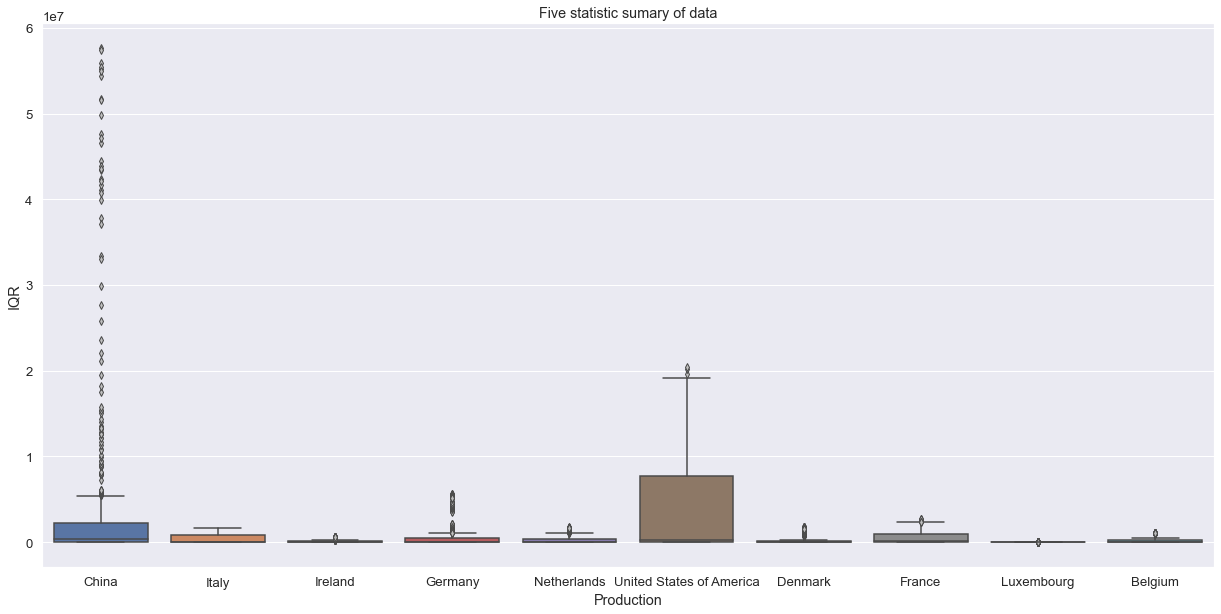

In [206]:
myboxplot(data2["Area"],data2["Production"],"Five statistic sumary of data", "Production",
          "IQR")

For production majority of outliers are in the data from China

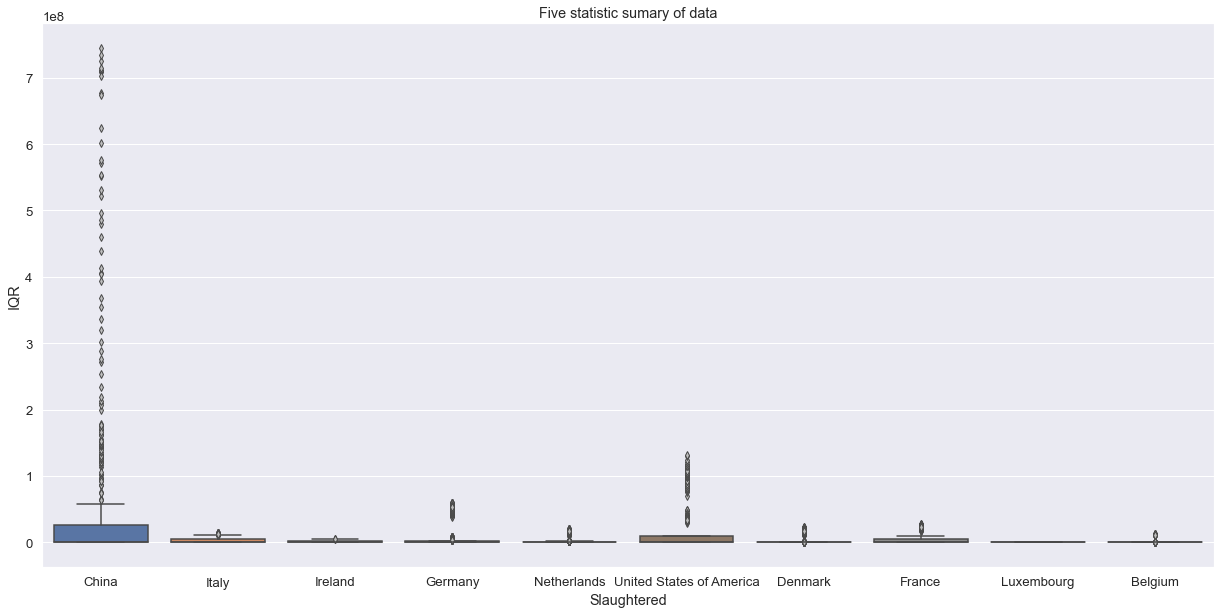

In [207]:
myboxplot(data2["Area"],data2["Slaughtered"],"Five statistic sumary of data", "Slaughtered",
          "IQR")

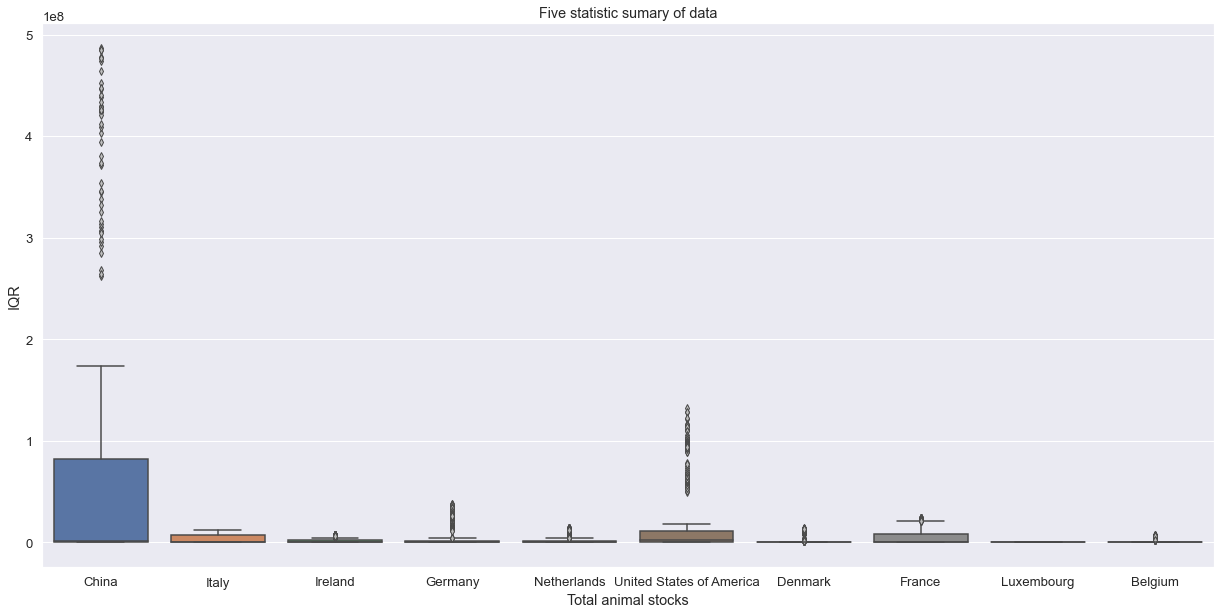

In [208]:
myboxplot(data2["Area"],data2["Stocks"],"Five statistic sumary of data", "Total animal stocks",
          "IQR")

### Dealing with of outliers

In [209]:
def calculate_IQR(dataframe):
    '''This function takes multiple dataframes as input, calculates the interquartile range (IQR)
    of the 'column' using numpy and returns it'''
    q3, q1 = np.percentile(dataframe, [75, 25])
    IQR = q3 - q1
    return IQR

In [210]:
data2.describe()

,Production,Slaughtered,Stocks
count,4.167000e+03,4.167000e+03,4.167000e+03
mean,1.210605e+06,1.083724e+07,1.226518e+07
std,4.495651e+06,5.340054e+07,4.714394e+07
min,1.000000e+00,1.000000e+00,2.000000e+00
25%,6.904000e+03,2.155600e+04,1.530050e+04
50%,6.699150e+04,2.426330e+05,1.960655e+05
75%,5.337545e+05,2.090946e+06,4.669500e+06
max,5.766187e+07,7.449179e+08,4.867429e+08


In [211]:
print(f" The IQR of animal stocking density is {calculate_IQR(data2.Stocks)}")
print(f" The IQR of slaughter is {calculate_IQR(data2.Slaughtered)}")
print(f" The IQR of production is {calculate_IQR(data2.Production)}")

 The IQR of animal stocking density is 4654199.5
 The IQR of slaughter is 2069389.5
 The IQR of production is 526850.5


Normally, removing outliers is recommended when carrying out machine learning as outliers can greatly bias the learning outcomes of the model. However, in some cases to remove outliers may introduce more bias than to transform them.

In the merged dataset we have several countries all of whom are vastly different in terms of size, economic activity and production capacity. In addition, the data in the FAO datasets are real observations and not errors. Therefore, in this case it is likely the removal of outliers will lead to errors as the production capacities and livestock densities of the US and China respectively vastly outweight the rest of the smaller EU countries. This may explain why the US and China show the majority of extreme values on the boxplots, as in comparison to the smaller countries whom dominate the dataset, their values are extreme.

Therefore, I shall not delete the outliers, I will attempt to minimise the bias by transforming each columns values into "log 10 values".

https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [212]:
def ml_log_values(dataframe, column, column2, column3):
    '''This function takes a a dataframe and columns as converts the values
    in the columns to logarithmic 10 values.'''
    dataframe[column] = np.log10(dataframe[column])
    dataframe[column2] = np.log10(dataframe[column2])
    dataframe[column3] = np.log10(dataframe[column3])
    return dataframe

In order to avoid infinite values upon logging, we first need to ensure no values exist which are below log10 to the power of 1 are in the dataset, therefore we shall filter out any value that is less than 10. 

In [213]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4167 entries, 1973 to 2020
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         4167 non-null   object 
 1   Item         4167 non-null   object 
 2   Production   4167 non-null   float64
 3   Slaughtered  4167 non-null   float64
 4   Stocks       4167 non-null   float64
dtypes: float64(3), object(2)
memory usage: 324.4+ KB


In [214]:
MLData_log = data2[(data2['Production'] > 10)]
MLData_log = MLData_log[(MLData_log['Slaughtered'] > 10)]
MLData_log = MLData_log[(MLData_log['Stocks'] > 10)]

In [215]:
MLData_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4080 entries, 1973 to 2020
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         4080 non-null   object 
 1   Item         4080 non-null   object 
 2   Production   4080 non-null   float64
 3   Slaughtered  4080 non-null   float64
 4   Stocks       4080 non-null   float64
dtypes: float64(3), object(2)
memory usage: 191.2+ KB


In [216]:
#data2.to_csv("C:\\Users\\shaun\\Desktop\\check.csv")

In [217]:
MLData_log = ml_log_values(MLData_log, 'Production', 'Slaughtered', 'Stocks')

In [218]:
MLData_log.head()

,Area,Item,Production,Slaughtered,Stocks
Year,,,,,
1973,China,Cattle,5.290507,6.298343,7.756709
1973,Italy,Rabbit,5.038461,4.862370,5.292401
1973,Italy,Pig,5.838345,6.860038,6.902530
1973,Italy,Horse,4.697229,5.480007,5.410440
1973,Italy,Goat,3.462398,5.666518,5.977861


In [219]:
# Checking for infinite  values
print(MLData_log.Production.min())
print(MLData_log.Production.max())
print(MLData_log.Slaughtered.min())
print(MLData_log.Slaughtered.max())
print(MLData_log.Stocks.min())
print(MLData_log.Stocks.max())

1.0413926851582251
7.760888730174848
1.0413926851582251
8.872108396866912
1.146128035678238
8.68729966633388


The impact of outliers is now reduced and no infinite values exist.

## Selecting Ireland for machine learning

In [220]:
# Making a function to select country and five animal types 
def select_country(df, country):
    '''This function takes a dataframe and country as input and filters the
    dataframe to select 5 animals for that specific country and create a new
    dataframe with this information'''
    df = df.loc[(df['Item'] == "Cattle")|
               (df['Item'] == "Chicken")|
               (df['Item'] == "Pig")|
               (df['Item'] == "Sheep")|
               (df['Item'] == "Horse")]

    df = df.loc[(df['Area'] == country)]
    
    return df

In [221]:
Ireland = select_country(MLData_log, 'Ireland')

In [222]:
Ireland.head()

,Area,Item,Production,Slaughtered,Stocks
Year,,,,,
1973,Ireland,Sheep,4.637119,6.227887,6.452492
1973,Ireland,Horse,3.365488,3.903090,5.014100
1973,Ireland,Chicken,4.553883,4.385606,3.961136
1973,Ireland,Cattle,5.316599,5.939469,6.774203
1973,Ireland,Pig,5.155336,6.324488,6.003116


In [223]:
Ireland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 1973 to 2020
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         239 non-null    object 
 1   Item         239 non-null    object 
 2   Production   239 non-null    float64
 3   Slaughtered  239 non-null    float64
 4   Stocks       239 non-null    float64
dtypes: float64(3), object(2)
memory usage: 11.2+ KB


In [224]:
Ireland.isnull().sum()

Area           0
Item           0
Production     0
Slaughtered    0
Stocks         0
dtype: int64

In [225]:
print(f"The area in this dataframe is: {Ireland.Area.unique()}\n")
print(f"The animals in this dataframe are: {Ireland.Item.unique()}\n")

The area in this dataframe is: ['Ireland']

The animals in this dataframe are: ['Sheep' 'Horse' 'Chicken' 'Cattle' 'Pig']



In [226]:
Ireland.isnull().sum()

Area           0
Item           0
Production     0
Slaughtered    0
Stocks         0
dtype: int64

## Setting up X and y train test

As I'm going to be using multiple countries as X and y, I have setup a function rapidly create them

In [227]:
# creating a function to select X & y
def get_X_y(dataframe):
    '''This function takes a dataframe as input and returns X & y'''
    X = dataframe.drop(columns="Production")
    y = dataframe.Production
    return X, y

In [228]:
# Setting up X and y

X, y = get_X_y(Ireland)

In [229]:
X

,Area,Item,Slaughtered,Stocks
Year,,,,
1973,Ireland,Sheep,6.227887,6.452492
1973,Ireland,Horse,3.903090,5.014100
1973,Ireland,Chicken,4.385606,3.961136
1973,Ireland,Cattle,5.939469,6.774203
1973,Ireland,Pig,6.324488,6.003116
...,...,...,...,...
2019,Ireland,Cattle,6.267761,6.816881
2020,Ireland,Sheep,6.492994,6.588520
2020,Ireland,Pig,6.549782,6.224939


## Splitting into train and test sets

In [230]:
from sklearn.model_selection import train_test_split

# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [231]:
#Checking the shapes are the same

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(191, 4)
(191,)
(48, 4)
(48,)


## X_train, X_ test scaling and encoding

In [232]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [233]:
cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_exclude=object)

In order to prevent over fitting, the X_train and X_test data needs to be scaled after it has been split. Otherwise data
leakage shall occur where the test set will inadvertently be given information about the data's mean value when it is scaled. 
By scaling them separately you prevent the test set form being given data it should not know about and improve model accuracy by preventing over fitting.

(Reference: Chapter 6 of 'Introduction to Machine Learning in Python Chapter' on pipelines).

In [234]:
# Creating a function to Scale the numerical X columns and one hot encode the 
# y columns. For this function to work it is important you create two 
# new instances of One Hot encoder for each dataset, if you use the same one
# the function will not encode the second set properly
# So each new X_train, Test must have a new pair of encoders if doing multiple
# datasets

def ml_data_prep(X_train, X_test, ohe, ohe2):
    '''This function takes X_train and X_Test as inputs and 2 one hot encoders.
    It then scales the test and train sets seperately to prevent data leakage, 
    it then identifies the categorical columns in both sets 
    and one hot encodes them'''
    X_train[num_selector] = StandardScaler().fit_transform(X_train[num_selector])
    X_test[num_selector] = StandardScaler().fit_transform(X_test[num_selector])
    
    ohe.fit_transform(X_train[cat_selector])
    encoded_train = pd.DataFrame(data=ohe.fit_transform(X_train[cat_selector]), columns=ohe.get_feature_names(), index=X_train.index)
    ohe2 = OneHotEncoder(sparse=False)
    ohe2.fit_transform(X_test[cat_selector])
    encoded_test = pd.DataFrame(data=ohe2.fit_transform(X_test[cat_selector]), columns=ohe2.get_feature_names(), index=X_test.index)
    
    X_train = pd.concat([X_train[num_selector], encoded_train], axis=1)
    X_train.reset_index(inplace=True)
    X_train.sort_values('Year', inplace=True, ascending=True)
    X_train.set_index('Year', inplace=True, drop=True)
    
    X_test = pd.concat([X_test[num_selector], encoded_test], axis=1)
    X_test.reset_index(inplace=True)
    X_test.sort_values('Year', inplace=True, ascending=True)
    X_test.set_index('Year', inplace=True, drop=True)
    
    return X_train, X_test

In [235]:
ohe = OneHotEncoder(sparse=False)
ohe2 = OneHotEncoder(sparse=False)

X_train, X_test = ml_data_prep(X_train, X_test, ohe, ohe2)

In [236]:
X_train

,Slaughtered,Stocks,x0_Ireland,x1_Cattle,x1_Chicken,x1_Horse,x1_Pig,x1_Sheep
Year,,,,,,,,
1973,-1.047353,-1.679697,1.0,0.0,1.0,0.0,0.0,0.0
1973,-1.492518,-0.668996,1.0,0.0,0.0,1.0,0.0,0.0
1973,0.386224,1.020462,1.0,1.0,0.0,0.0,0.0,0.0
1973,0.741439,0.280324,1.0,0.0,0.0,0.0,1.0,0.0
1973,0.652315,0.711663,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2019,-0.495847,-0.401865,1.0,0.0,1.0,0.0,0.0,0.0
2020,-0.469471,-0.401865,1.0,0.0,1.0,0.0,0.0,0.0
2020,0.896900,0.842232,1.0,0.0,0.0,0.0,0.0,1.0


# Random Forest - Regressor model 1

### RF Optimised using GridSearch CV

In [237]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state=42)

param_grid = {'bootstrap': [True, False],
    'n_estimators': [200, 800, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 50, 100],
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5)

CV_rfr.fit(X_train, y_train)
print(CV_rfr.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}


## Model metrics

In [238]:
# importing regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [239]:
# Performing a prediction with the RF model

y_pred = CV_rfr.predict(X_test)

In [240]:
# Checking the train and test accuracy of the model
print(f"The train score is: {CV_rfr.score(X_train, y_train)}")
print(f"The test score is: {CV_rfr.score(X_test, y_test)}")


The train score is: 0.7787686597546606
The test score is: -0.48280015348261607


In [241]:
# Calculating the performance of the model

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"The mean square error is: {mse}")
print(f"The mean absolute error is: {mae}")

The mean square error is: 1.1954393527184266
The mean absolute error is: 0.8387084973758611


Model is very over fit, we shall try to improve by removing the test train split and only doing cross validation.

This is due to the dataset being small in size, so the train test is splitting 80-20% and then cross fold is splitting each 5x again with cv=5. Therefore, I can re-attempt without the train test split.

## Finding Important Features of RF-V2 using Scikit-learn

The model performed poorly so there is no need to get feature importance, however for the purposes of this CA I have demonstrated how to do it here

In [242]:
ohe.get_feature_names()

array(['x0_Ireland', 'x1_Cattle', 'x1_Chicken', 'x1_Horse', 'x1_Pig',
       'x1_Sheep'], dtype=object)

In [243]:
sorted_idx = CV_rfr.best_estimator_.feature_importances_.argsort()

In [244]:
CV_rfr.best_estimator_.feature_importances_

array([0.45631365, 0.48829428, 0.        , 0.016709  , 0.01188283,
       0.00614353, 0.00781795, 0.01283875])

In [245]:
newCols = data.columns
df = newCols

Text(0.5, 0, 'Feature Importance')

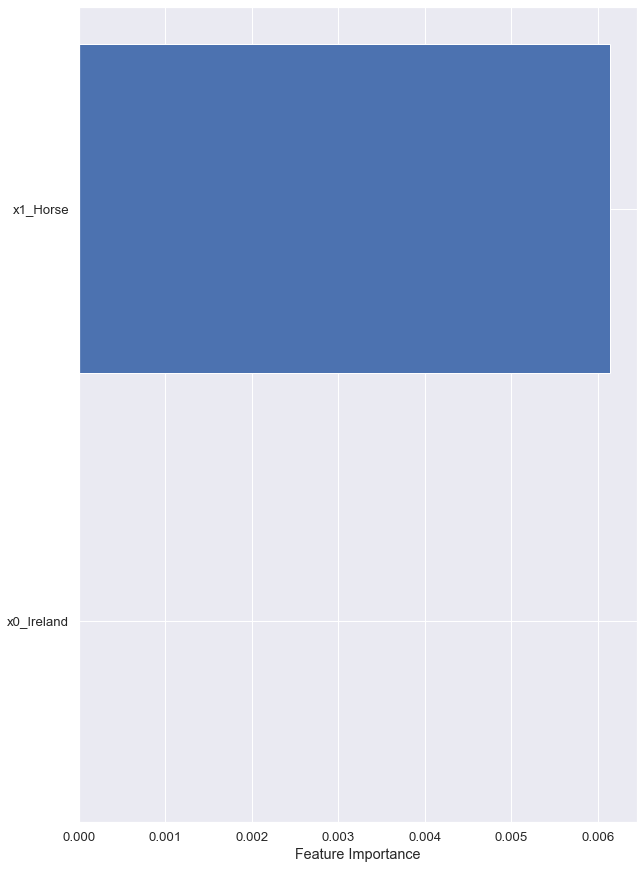

In [246]:
cutOff = 0.04
plt.figure(figsize=(10,15))
plt.barh(np.array(X_train.columns)[sorted_idx][CV_rfr.best_estimator_.feature_importances_ > cutOff], 
         CV_rfr.best_estimator_.feature_importances_[sorted_idx][CV_rfr.best_estimator_.feature_importances_ > cutOff])
plt.xlabel("Feature Importance")

# Support vector machine (SVM) - Model 2

Here we can try a different model to see if the results are better than RF1. The Data for is plugged into a Support vector model

In [247]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [248]:
print(f"The train score is {regressor.score(X_train, y_train)}")
print(f"The test score is {regressor.score(X_test, y_test)}")

The train score is 0.020305772701636582
The test score is -0.08181775070912378


In [249]:
regressor.score(X_train, y_train)

0.020305772701636582

# Model 3 Random Forest Regressor  - No train test split, Cross Validation Only

The introduction to machine learning in Python books states that for small datasets, train test split in combination with crossfold validation might split the data into too many small parts for the model to train successfully. This is the issue with the datasets as while there are many total observations, these equate to one per year per animal group from 2020 to 1973. Therefore, this results in a small number of observations being available for training after the data is split.

In this model, we shall re-attempt Random Forest without a train test set. We shall train the model using X & y without a split and use 5 fold cross validation (CV=5) instead.

## Creating X2 and y2, scaling and encoding

In [250]:
# Copying X and y from RF1
X2 = X
y2 = y

In [251]:
X2[num_selector] = StandardScaler().fit_transform(X2[num_selector])

In [252]:
ohe3 = OneHotEncoder(sparse=False)

ohe3.fit_transform(X2[cat_selector])
encoded_train = pd.DataFrame(data=ohe3.fit_transform(X2[cat_selector]), columns=ohe3.get_feature_names(), index=X2.index)

In [253]:
# I am not using the function here as there is no X_test
X2 = pd.concat([X2[num_selector], encoded_train], axis=1)
X2.reset_index(inplace=True)
X2.sort_values('Year', inplace=True, ascending=True)
X2.set_index('Year', inplace=True, drop=True)
X2

,Slaughtered,Stocks,x0_Ireland,x1_Cattle,x1_Chicken,x1_Horse,x1_Pig,x1_Sheep
Year,,,,,,,,
1973,0.640398,0.691791,1.0,0.0,0.0,0.0,0.0,1.0
1973,-1.487166,-0.658085,1.0,0.0,0.0,1.0,0.0,0.0
1973,-1.045585,-1.646252,1.0,0.0,1.0,0.0,0.0,0.0
1973,0.376450,0.993705,1.0,1.0,0.0,0.0,0.0,0.0
1973,0.728804,0.270069,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2019,0.676889,1.033757,1.0,1.0,0.0,0.0,0.0,0.0
2020,0.683143,1.031875,1.0,1.0,0.0,0.0,0.0,0.0
2020,0.883013,0.819449,1.0,0.0,0.0,0.0,0.0,1.0


##  Model 2 execution

In [254]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr2 = RandomForestRegressor(random_state=42)

param_grid = {'bootstrap': [True, False],
    'n_estimators': [200, 800, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 50, 100],
}

CV_rfr2 = GridSearchCV(estimator=rfr2, param_grid=param_grid, cv=5)

CV_rfr2.fit(X2, y2)
print(CV_rfr2.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 800}


In [255]:
# Performing a prediction with the RF model

y_pred_r = CV_rfr2.predict(X2)

In [256]:
# Checking the accuracy of the model
print(f"The accuracy score is: {CV_rfr2.score(X2, y2)}")


The accuracy score is: 0.879734009072516


Score is now 87% however, there is no way to evaluate if the model is over fit as there was no test split. Therefore the only way to determine if the model is working is run an evaluation versus another countries data. This model was trained on Ireland so we can use another European country for the validation.

In [257]:
# Calculating the performance of the model

mse = mean_squared_error(y2, y_pred_r)
mae = mean_absolute_error(y2, y_pred_r)

print(f"The mean square error is: {mse}")
print(f"The mean absolute error is: {mae}")


The mean square error is: 0.09146704745798698
The mean absolute error is: 0.2102303762321508


## Saving RF2 for validation using 'Pickle'

In [258]:
import pickle

In [259]:
# create an iterator object with write permission - model.pkl
with open('RandF2', 'wb') as files:
    pickle.dump(CV_rfr2, files)

## Importing the model as needed

In [260]:
import pickle

# load saved model
with open('RandF2' , 'rb') as f:
    RF2V = pickle.load(f)

# Validation testing of RF model 3 on data from Belgium

## Selecting Belgian Data

In [261]:
# Selecting the countries and livestock for comparison

val_df = select_country(MLData_log, "Belgium")

In [262]:
val_df.head()

,Area,Item,Production,Slaughtered,Stocks
Year,,,,,
2000,Belgium,Sheep,3.652246,5.338456,5.099124
2000,Belgium,Pig,6.018001,7.045937,6.867381
2000,Belgium,Horse,3.770852,4.309630,4.491362
2000,Belgium,Chicken,5.602451,5.440909,4.591065
2000,Belgium,Cattle,5.439901,5.920606,6.483096


In [263]:
print(f"The area in this dataframe is: {val_df.Area.unique()}\n")
print(f"The animals in this dataframe are: {val_df.Item.unique()}\n")

The area in this dataframe is: ['Belgium']

The animals in this dataframe are: ['Sheep' 'Pig' 'Horse' 'Chicken' 'Cattle']



### Dealing with missing values

In [264]:
calc_percent_missing(val_df.isnull().sum(), len(val_df))

The percentage of missing values is:
Area           0.0
Item           0.0
Production     0.0
Slaughtered    0.0
Stocks         0.0
dtype: float64


No missing values

### Creating X3

In [265]:
X3 = val_df.drop(columns='Production')
y3 = val_df.Production

### Scaling and OHE X3

As this is a validation there is no train test split so I don't use the function to clean up. I just do it manually as there is only one set of data

In [266]:
X3[num_selector] = StandardScaler().fit_transform(X3[num_selector])

In [267]:
ohe4 = OneHotEncoder(sparse=False)

ohe4.fit_transform(X3[cat_selector])
encoded_train = pd.DataFrame(data=ohe4.fit_transform(X3[cat_selector]), columns=ohe4.get_feature_names(), index=X3.index)

In [268]:
X3 = pd.concat([X3[num_selector], encoded_train], axis=1)
X3.reset_index(inplace=True)
X3.sort_values('Year', inplace=True, ascending=True)
X3.set_index('Year', inplace=True, drop=True)
X3

,Slaughtered,Stocks,x0_Belgium,x1_Cattle,x1_Chicken,x1_Horse,x1_Pig,x1_Sheep
Year,,,,,,,,
2000,-0.197570,-0.442247,1.0,0.0,0.0,0.0,0.0,1.0
2000,1.518060,1.425592,1.0,0.0,0.0,0.0,1.0,0.0
2000,-1.231307,-1.084237,1.0,0.0,0.0,1.0,0.0,0.0
2000,-0.094628,-0.978919,1.0,0.0,1.0,0.0,0.0,0.0
2000,0.387359,1.019666,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2019,-0.064996,-0.238086,1.0,0.0,1.0,0.0,0.0,0.0
2020,-0.062196,-0.238086,1.0,0.0,1.0,0.0,0.0,0.0
2020,0.360191,0.898477,1.0,1.0,0.0,0.0,0.0,0.0


## Validation Predicting X3

In [269]:
RF2V.score(X3, y3)

0.1394230716582343

Validation shows Model Random Forest 2 is over fit.

# K-Nearest Neighbor (KNN) Regressor - Model 4

Here I will compare KNN Regressor to the X & y for Ireland inputs into Random Forest 1 to see if the model performs better

Importing KNN regressor model and setting the neighbors range

In [270]:
from sklearn.neighbors import KNeighborsRegressor

In [271]:
neighbors = np.arange(1, 21)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix

Enumerating over all the 20 neighbor values and predicting both on training and testing data. Then we store, the accuracy in the X_train and y_train numpy arrays.

In [272]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsRegressor(n_neighbors = k)           # Initialise an object knn using KKNeighborsRegressor method

    #Fit the model
    knn.fit(X_train, y_train)                      # Call fit method to implement the ML KNeighborsRegressor model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)      # Save the score value in the train_accuracy array

Plotting the training and testing accuracy using matplotlib, with accuracy vs. varying number of neighbors graph. This allows us to visualise the best k value at which the KNN model performs the best.

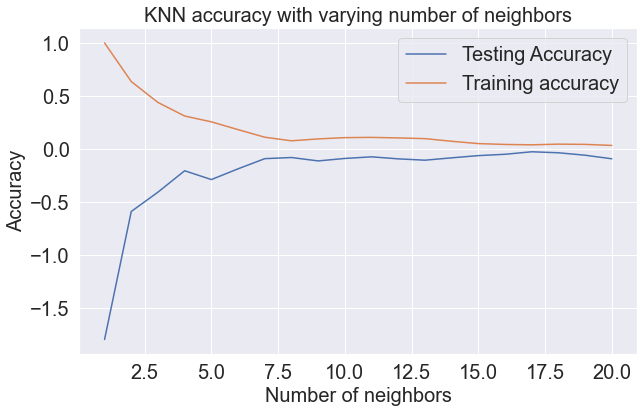

In [273]:
# Declare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()



The accuracy is decreasing in training, the data set is too small.

In [274]:
# Declare and initialise an object 'KNeighborsClassifier' with 13 neighbors
knn = KNeighborsRegressor(n_neighbors = 1)

# Fitting the model
knn.fit(X_train, y_train)

# Computing accuracy on the training set
train_accuracy = knn.score(X_train, y_train)

# Computing accuracy on the test set
test_accuracy = knn.score(X_test, y_test)

## KNN Accuracy

In [275]:
#Display training accuracy
print(f"The train accuracy is: {train_accuracy}")

# Displaying the test accuracy
print(f"The test accuracy is: {test_accuracy}")

The train accuracy is: 1.0
The test accuracy is: -1.7938036566796947


The KNN model performance is poor. 

In [276]:
print("Test set R^2: {:.2f}".format(knn.score(X_test, y_test)))

Test set R^2: -1.79


Here, the R square shows the model performed quite poorly

# Multiple Countries Random Forest Regressor - Model 5

Due to the issues with small sample size from subsetting the data to predict meat production based on slaughter numbers and stocking data. In this version of the model I will use the data from all countries with each country being it's own category in the rows.

For this version we shall use seven countries Ireland, France, Germany, Italy, Netherlands, China and the USA and compare across four animal types "Cattle, Chickens, Sheep and horses".

## Importing several countries data

In [277]:
Multi = MLData_log.loc[(MLData_log['Item'] == "Cattle")| 
                      (MLData_log['Item'] == "Chicken")|
                      (MLData_log['Item'] == "Horse")|
                      (MLData_log['Item'] == "Sheep")]

Multi = Multi.loc[(Multi['Area'] == "Ireland")|
                    (Multi['Area'] == "France")|
                    (Multi['Area'] == "Germany")|
                    (Multi['Area'] == "Italy")|
                    (Multi['Area'] == "Netherlands")|
                    (Multi['Area'] == "China")|
                    (Multi['Area'] == "United States of America")]

In [278]:
Multi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 1973 to 2020
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1336 non-null   object 
 1   Item         1336 non-null   object 
 2   Production   1336 non-null   float64
 3   Slaughtered  1336 non-null   float64
 4   Stocks       1336 non-null   float64
dtypes: float64(3), object(2)
memory usage: 62.6+ KB


In [279]:
Multi.head()

,Area,Item,Production,Slaughtered,Stocks
Year,,,,,
1973,China,Cattle,5.290507,6.298343,7.756709
1973,Italy,Horse,4.697229,5.480007,5.410440
1973,Italy,Chicken,5.806858,5.692847,5.112270
1973,Italy,Cattle,6.025715,6.691771,6.941402
1973,Italy,Sheep,4.662758,6.756560,6.890438


In [280]:
Multi.columns

Index(['Area', 'Item', 'Production', 'Slaughtered', 'Stocks'], dtype='object')

In [281]:
total_missing(Multi)

The number of missing values is 
Area           0
Item           0
Production     0
Slaughtered    0
Stocks         0
dtype: int64

The percentage of missing values is:
Area           0.0
Item           0.0
Production     0.0
Slaughtered    0.0
Stocks         0.0
dtype: float64
None


## Creating X & y

In [282]:
X4, y4 = get_X_y(Multi)

## Splitting in train and test

In [283]:
# Split the data set into train and test 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X4, y4, test_size = 0.2, random_state = 0)

## Scaling and encoding

In [284]:
ohe4 = OneHotEncoder(sparse=False)
ohe5 = OneHotEncoder(sparse=False)

X_train2, X_test2 = ml_data_prep(X_train2, X_test2, ohe4, ohe5)

In [285]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state=42)

param_grid = {'bootstrap': [True, False],
    'n_estimators': [200, 800, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 50, 100],
}

CV_rfr3 = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5)

CV_rfr3.fit(X_train2, y_train2)
print(CV_rfr.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}


## Model metrics

In [286]:
# importing regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [287]:
# Performing a prediction with the RF model

y_pred2 = CV_rfr3.predict(X_test2)

In [288]:
# Checking the train and test accuracy of the model
print(f"The train score is: {CV_rfr3.score(X_train2, y_train2)}")
print(f"The test score is: {CV_rfr3.score(X_test2, y_test2)}")


The train score is: 0.352692573782563
The test score is: -0.09350018426943052


Model performance is very poor. The train set is also over fit. There is no point in changing the train_test split as the data's ability to predict the label is over all poor. It is not an issue of features or model parameters

In [289]:
# Calculating the performance of the model

mse = mean_squared_error(y_test2, y_pred2)
mae = mean_absolute_error(y_test2, y_pred2)

print(f"The mean square error is: {mse}")
print(f"The mean absolute error is: {mae}")

The mean square error is: 1.2091777558401402
The mean absolute error is: 0.8919328598493071


Running multiple countries did not improve model performance. Therefore, adding more data did not result in an increase in prediction accuracy, this highlights that animal stocking densities and animal slaughter numbers cannot be used to predict meat production. 

# Interactive Dashboard - Machine Learning results

## Building a Hub to host all models

In [290]:
from explainerdashboard import RegressionExplainer
from explainerdashboard import ExplainerDashboard
from explainerdashboard import ExplainerHub
import os

## Building a Hub to host all models

In [291]:
Dash_1 = ExplainerDashboard(RegressionExplainer(CV_rfr, X_test, y_test), title='Random Forest Optimised Parameters - Ireland')
Dash_2 = ExplainerDashboard(RegressionExplainer(regressor, X_test, y_test), title='Support Vector Machine - Ireland')
Dash_3 = ExplainerDashboard(RegressionExplainer(CV_rfr2, X2, y2), title='Random Forest No "Train-Test" Split - Ireland')
Dash_4 = ExplainerDashboard(RegressionExplainer(knn, X_test, y_test), title='K-Nearest Neighbor - Ireland')
Dash_5 = ExplainerDashboard(RegressionExplainer(CV_rfr3, X_test2, y_test2), title='Random Forest Optimised Parameters - Ireland')
HUB = ExplainerHub([Dash_1, Dash_2, Dash_3, Dash_4, Dash_5], secret_key=os.environ.get('e1f0a3cf-b31a-45b9-a0cc-6fa4254dc372'))

HUB.run(port=8050)

Generating self.shap_explainer = shap.KernelExplainer(model, X)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/48 [00:00<?, ?it/s]

Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Generating self.shap_explainer = shap.KernelExplainer(model, X)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/48 [00:00<?, ?it/s]

Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Generating self.shap_explainer = shap.KernelExplainer(model, X)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/239 [00:00<?, ?it/s]

Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Generating self.shap_explainer = shap.KernelExplainer(model, X)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/48 [00:00<?, ?it/s]

Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Generating self.shap_explainer = shap.KernelExplainer(model, X)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/268 [00:00<?, ?it/s]

Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


Using random SECRET_KEY: 4181d8ec-5799-4584-b34f-10050164c413, please set it on your app.config["SECRET_KEY"]


Reminder, you can set ExplainerDashboard .name and .description in order to control the url path of the dashboard. Now defaulting to name=dashboard1 and default description...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating dependencies...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Reminder, you can set ExplainerDashboard .name and .description in order to control the url path of the dashboard. Now defaulting to name=dashboard2 and default description...
Bu

 * Running on all addresses.
 * Running on http://192.168.1.11:8050/ (Press CTRL+C to quit)
192.168.1.11 - - [22/May/2022 19:21:03] "GET / HTTP/1.1" 200 -
192.168.1.11 - - [22/May/2022 19:21:03] "GET /index/ HTTP/1.1" 200 -
192.168.1.11 - - [22/May/2022 19:21:03] "GET /index/_dash-layout HTTP/1.1" 200 -
192.168.1.11 - - [22/May/2022 19:21:03] "GET /index/_dash-dependencies HTTP/1.1" 200 -
192.168.1.11 - - [22/May/2022 19:21:16] "GET /dashboards/_dashboard1 HTTP/1.1" 200 -
192.168.1.11 - - [22/May/2022 19:21:16] "GET /dashboards/dashboard1/ HTTP/1.1" 200 -
192.168.1.11 - - [22/May/2022 19:21:16] "GET /dashboards/dashboard1/_dash-component-suites/dash/deps/polyfill@7.v2_4_1m1653229781.12.1.min.js HTTP/1.1" 200 -
192.168.1.11 - - [22/May/2022 19:21:16] "GET /dashboards/dashboard1/_dash-component-suites/dash/deps/react-dom@16.v2_4_1m1653229781.14.0.min.js HTTP/1.1" 200 -
192.168.1.11 - - [22/May/2022 19:21:16] "GET /dashboards/dashboard1/_dash-component-suites/dash/deps/react@16.v2_4_1m165

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

192.168.1.11 - - [22/May/2022 19:21:17] "

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

POST /dashboards/dashboard1/_dash-update-component HTTP/1.1

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

" 500 -


Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

192.168.1.11 - - [22/May/2022 19:21:17] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

" 500 -


Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

192.168.1.11 - - [22/May/2022 19:21:17] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

" 500 -


Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

192.168.1.11 - - [22/May/2022 19:21:17] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1

Exception on /dashboards/dashboard1/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\shaun\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\shaun\anaconda3\lib\site-packages\dash\dash.py", line 1372, in dispa

" 500 -
192.168.1.11 - - [22/May/2022 19:21:17] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 500 -
192.168.1.11 - - [22/May/2022 19:21:17] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
192.168.1.11 - - [22/May/2022 19:21:17] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 204 -
192.168.1.11 - - [22/May/2022 19:21:17] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 204 -
192.168.1.11 - - [22/May/2022 19:21:18] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
192.168.1.4 - - [22/May/2022 19:23:12] "GET / HTTP/1.1" 200 -
192.168.1.4 - - [22/May/2022 19:23:13] "GET /static/bootstrap.min.css HTTP/1.1" 200 -
192.168.1.4 - - [22/May/2022 19:23:13] "GET /static/jquery-3.5.1.slim.min.js HTTP/1.1" 200 -
192.168.1.4 - - [22/May/2022 19:23:13] "GET /static/bootstrap.min.js HTTP/1.1" 200 -
192.168.1.4 - - [22/May/2022 19:23:14] "GET /index/ HTTP/1.1" 200 -
192.168.1.4 - - [22/May/2022 19:23:14] "GET /index/assets/

In [292]:
#$ export SECRET_KEY=

# Appendix

## Single Dashboard for Model No. 3 - Random Forest

In [293]:
#explainer = RegressionExplainer(CV_rfr3, X_test, y_test)

In [294]:
#ExplainerDashboard(explainer).run()

## Getting Explainer Hub Secret Key

In [295]:
#Dash_1 = ExplainerDashboard(RegressionExplainer(CV_rfr, X_test, y_test), title='Random Forest Optimised Parameters - Ireland')
#Dash_2 = ExplainerDashboard(RegressionExplainer(regressor, X_test, y_test), title='Support Vector Machine - Ireland')


In [296]:
#First run of the HUB to get the secret key

#HUB = ExplainerHub([Dash_1, Dash_2])

In [297]:
#SECRET_KEY: e1f0a3cf-b31a-45b9-a0cc-6fa4254dc372

In [298]:
#HUB.run(port=8050)